# Rainfall Prediction - Weather Forecasting
### Problem Statement:

Rain Prediction –Weather forecasting

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.

Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:
 
1. Problem Statement: 


a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.


b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.


Dataset Description:

Number of columns: 23


Date  - The date of observation

Location  -The common name of the location of the weather station

MinTemp  -The minimum temperature in degrees celsius

MaxTemp -The maximum temperature in degrees celsius

Rainfall  -The amount of rainfall recorded for the day in mm

Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am

Sunshine  -The number of hours of bright sunshine in the day.

WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight

WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight

WindDir9am -Direction of the wind at 9am

WindDir3pm -Direction of the wind at 3pm

WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am

WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm

Humidity9am -Humidity (percent) at 9am

Humidity3pm -Humidity (percent) at 3pm

Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am

Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm

Cloud9am - Fraction of sky obscured by cloud at 9am. 

Cloud3pm -Fraction of sky obscured by cloud 

Temp9am-Temperature (degrees C) at 9am

Temp3pm -Temperature (degrees C) at 3pm

RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
pd.options.display.max_columns = None
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('weatherAUS.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [3]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

We see a Null values in all the columns other than date and location

### Splitting the Date in Month and Year

In [4]:
df.insert(1, 'Day', 0)
df['Day'] = pd.to_datetime(df['Date']).dt.day
df.insert(2, 'Month', 0)
df['Month'] = pd.to_datetime(df['Date']).dt.month
df.insert(3, 'Year', 0)
df['Year'] = pd.to_datetime(df['Date']).dt.year

In [5]:
df.drop('Date',axis=1,inplace=True)

In [6]:
df

,Day,Month,Year,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,1,12,2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2,12,2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,3,12,2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,4,12,2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,5,12,2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,21,6,2017,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,22,6,2017,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,23,6,2017,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,24,6,2017,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


### Lets try to fill the null values based on the location

In [7]:
cat_columns = []
numeric_columns = []
for i in df.dtypes.index:
    if df[i].dtypes == 'object':
        cat_columns.append(i)
    else:
        numeric_columns.append(i)
cat_columns,numeric_columns

(['Location',
  'WindGustDir',
  'WindDir9am',
  'WindDir3pm',
  'RainToday',
  'RainTomorrow'],
 ['Day',
  'Month',
  'Year',
  'MinTemp',
  'MaxTemp',
  'Rainfall',
  'Evaporation',
  'Sunshine',
  'WindGustSpeed',
  'WindSpeed9am',
  'WindSpeed3pm',
  'Humidity9am',
  'Humidity3pm',
  'Pressure9am',
  'Pressure3pm',
  'Cloud9am',
  'Cloud3pm',
  'Temp9am',
  'Temp3pm'])

In [8]:
pivot_table1 = df.pivot_table(values=numeric_columns,index=['Location'],aggfunc=(lambda x:x.mean()))
pivot_table1

,Cloud3pm,Cloud9am,Day,Evaporation,Humidity3pm,Humidity9am,MaxTemp,MinTemp,Month,Pressure3pm,Pressure9am,Rainfall,Sunshine,Temp3pm,Temp9am,WindGustSpeed,WindSpeed3pm,WindSpeed9am,Year
Location,,,,,,,,,,,,,,,,,,,
Adelaide,NaN,NaN,15.941463,5.005594,44.809756,59.029268,21.435122,10.980000,9.048780,1018.074634,1020.091220,1.407960,NaN,20.189756,15.861951,37.990244,16.404878,11.317073,2014.000000
Albury,5.334247,6.373961,15.646086,NaN,47.062845,72.604190,22.821729,10.045233,6.197354,1014.981477,1017.581477,2.122272,NaN,21.673539,14.555347,33.850279,14.283186,8.230088,2009.690187
Brisbane,3.897924,3.694301,15.747841,4.874740,54.192374,66.472318,25.465052,15.372837,6.058722,1015.031023,1018.123661,3.112544,7.927857,23.981456,20.690484,26.288462,9.655113,6.031088,2011.452504
CoffsHarbour,4.114943,3.816694,15.749591,3.658389,60.663934,66.314239,23.273934,13.705082,6.641571,1016.103460,1018.590805,5.439016,7.332570,21.744590,19.611620,38.807560,20.518883,15.394089,2009.513912
Darwin,3.580000,3.800000,15.660000,6.353414,43.932000,63.828000,31.966800,21.324800,6.752000,1009.524800,1013.373200,2.735200,9.389200,30.668000,25.601200,39.288000,20.204000,16.012000,2012.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Penrith,NaN,NaN,15.751037,NaN,45.481328,72.863071,23.378838,11.279668,6.647303,NaN,NaN,2.358664,NaN,22.135270,15.533195,31.395010,11.024896,5.626556,2014.531120
PerthAirport,3.559801,3.449336,15.694352,5.784788,42.131229,58.833887,25.907558,13.172674,6.255814,1014.548173,1017.082045,1.916279,8.801000,24.472176,19.330648,44.879121,21.353821,18.043189,2012.215947
Uluru,5.285714,6.000000,17.128205,NaN,25.512821,53.564103,22.939474,5.997436,5.641026,1021.148718,1024.779487,0.010256,NaN,22.123077,11.523077,34.763158,16.769231,13.282051,2017.000000


In [9]:
for l in numeric_columns: 
    missing = df[l].isnull()
    for i,item in enumerate(df['Location']):
        if missing[i]:
            df[l][i] = pivot_table1.loc[item][l]

In [10]:
df

,Day,Month,Year,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,1,12,2008,Albury,13.4,22.900000,0.6,NaN,NaN,W,44.000000,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,5.334247,16.9,21.8,No,No
1,2,12,2008,Albury,7.4,25.100000,0.0,NaN,NaN,WNW,44.000000,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,6.373961,5.334247,17.2,24.3,No,No
2,3,12,2008,Albury,12.9,25.700000,0.0,NaN,NaN,WSW,46.000000,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,6.373961,2.000000,21.0,23.2,No,No
3,4,12,2008,Albury,9.2,28.000000,0.0,NaN,NaN,NE,24.000000,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,6.373961,5.334247,18.1,26.5,No,No
4,5,12,2008,Albury,17.5,32.300000,1.0,NaN,NaN,W,41.000000,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,21,6,2017,Uluru,2.8,23.400000,0.0,NaN,NaN,E,31.000000,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,6.000000,5.285714,10.1,22.4,No,No
8421,22,6,2017,Uluru,3.6,25.300000,0.0,NaN,NaN,NNW,22.000000,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,6.000000,5.285714,10.9,24.5,No,No
8422,23,6,2017,Uluru,5.4,26.900000,0.0,NaN,NaN,N,37.000000,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,6.000000,5.285714,12.5,26.1,No,No
8423,24,6,2017,Uluru,7.8,27.000000,0.0,NaN,NaN,SE,28.000000,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0,No,No


In [11]:
df.isnull().sum()

Day                 0
Month               0
Year                0
Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation      2724
Sunshine         2929
WindGustDir       991
WindGustSpeed     822
WindDir9am        829
WindDir3pm        308
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am      1304
Pressure3pm      1304
Cloud9am          687
Cloud3pm          687
Temp9am             0
Temp3pm             0
RainToday         240
RainTomorrow      239
dtype: int64

### Lets try and fill the remaining null values based on the month

In [12]:
pivot_table2 = df.pivot_table(values=['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm'],index=['Month'],aggfunc=(lambda x:x.mean()))
pivot_table2

,Cloud3pm,Cloud9am,Evaporation,Humidity3pm,Humidity9am,MaxTemp,MinTemp,Pressure3pm,Pressure9am,Rainfall,Sunshine,Temp3pm,Temp9am,WindGustSpeed,WindSpeed3pm,WindSpeed9am
Month,,,,,,,,,,,,,,,,
1,4.428555,4.893217,8.593265,47.797801,62.241814,29.641302,18.302470,1011.125909,1013.245000,2.913539,9.210439,27.797726,23.016948,44.438291,21.313212,15.299621
2,4.508908,4.800169,8.052965,52.095058,67.448981,29.040822,18.751071,1012.769590,1014.918284,3.237411,8.972636,27.508745,22.812650,42.246209,19.175053,13.826822
3,4.682055,5.033066,6.636473,52.875696,70.356752,27.355175,17.117598,1014.798549,1017.043413,3.140628,7.856396,25.901682,20.955420,39.820483,18.503668,12.692222
4,4.959625,5.263923,5.637931,54.555247,70.975584,24.538872,14.616169,1016.910588,1019.522353,4.113173,7.362092,23.263850,19.081238,37.535770,17.254511,13.058711
5,4.942289,5.068119,4.197605,53.667904,72.622188,21.076152,10.705794,1017.821700,1020.429572,1.964235,6.665926,20.015567,15.075025,35.175092,16.085593,13.052904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,4.526264,4.230393,3.635733,50.473573,69.737897,19.392505,8.374047,1016.956736,1019.711747,1.949878,7.385072,18.368258,13.298115,37.646399,16.707888,12.551646
9,4.567555,4.491918,4.800296,48.686882,63.693342,21.578351,10.553859,1015.198901,1017.963052,1.846274,7.569737,20.143382,16.164743,42.153568,19.512627,14.730619
10,4.410493,4.602458,6.073748,47.773173,63.323852,24.091980,12.555781,1015.921898,1018.312989,3.032163,8.079248,22.448431,17.878648,42.177802,20.629223,15.054158


In [13]:
for l in numeric_columns: 
    missing = df[l].isnull()
    for i,item in enumerate(df['Month']):
        if missing[i]:
            df[l][i] = pivot_table2.loc[item][l]

In [14]:
df.isnull().sum()

Day                0
Month              0
Year               0
Location           0
MinTemp            0
MaxTemp            0
Rainfall           0
Evaporation        0
Sunshine           0
WindGustDir      991
WindGustSpeed      0
WindDir9am       829
WindDir3pm       308
WindSpeed9am       0
WindSpeed3pm       0
Humidity9am        0
Humidity3pm        0
Pressure9am        0
Pressure3pm        0
Cloud9am           0
Cloud3pm           0
Temp9am            0
Temp3pm            0
RainToday        240
RainTomorrow     239
dtype: int64

### Lets fill the Categorical Columns Values with the Mode based on Month

In [15]:
pivot_table3 = df.pivot_table(values=['WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow'],index=['Month'],aggfunc=(lambda x:x.mode()[0]))
pivot_table3

,RainToday,RainTomorrow,WindDir3pm,WindDir9am,WindGustDir
Month,,,,,
1,No,No,SE,SE,S
2,No,No,SE,SE,E
3,No,No,SE,N,E
4,No,No,SE,SW,SSE
5,No,No,SSE,NW,WNW
...,...,...,...,...,...
8,No,No,NW,N,N
9,No,No,WSW,N,N
10,No,No,S,N,N


In [16]:
for l in cat_columns: 
    missing = df[l].isnull()
    for i,item in enumerate(df['Month']):
        if missing[i]:
            df[l][i] = pivot_table3.loc[item][l]

In [17]:
df

,Day,Month,Year,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,1,12,2008,Albury,13.4,22.900000,0.6,8.569709,8.719174,W,44.000000,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,5.334247,16.9,21.8,No,No
1,2,12,2008,Albury,7.4,25.100000,0.0,8.569709,8.719174,WNW,44.000000,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,6.373961,5.334247,17.2,24.3,No,No
2,3,12,2008,Albury,12.9,25.700000,0.0,8.569709,8.719174,WSW,46.000000,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,6.373961,2.000000,21.0,23.2,No,No
3,4,12,2008,Albury,9.2,28.000000,0.0,8.569709,8.719174,NE,24.000000,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,6.373961,5.334247,18.1,26.5,No,No
4,5,12,2008,Albury,17.5,32.300000,1.0,8.569709,8.719174,W,41.000000,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,21,6,2017,Uluru,2.8,23.400000,0.0,3.531983,6.427104,E,31.000000,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,6.000000,5.285714,10.1,22.4,No,No
8421,22,6,2017,Uluru,3.6,25.300000,0.0,3.531983,6.427104,NNW,22.000000,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,6.000000,5.285714,10.9,24.5,No,No
8422,23,6,2017,Uluru,5.4,26.900000,0.0,3.531983,6.427104,N,37.000000,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,6.000000,5.285714,12.5,26.1,No,No
8423,24,6,2017,Uluru,7.8,27.000000,0.0,3.531983,6.427104,SE,28.000000,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0,No,No


In [18]:
df.isnull().sum()

Day              0
Month            0
Year             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

We do not see any unusual data paterns in the dataset

In [19]:
for i in df.columns:
    print(i)
    print(df[i].unique())
    print('*'*100)
    print()

Day
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
****************************************************************************************************

Month
[12  1  2  3  4  5  6  7  8  9 10 11]
****************************************************************************************************

Year
[2008 2009 2010 2011 2013 2014 2015 2016 2017 2012]
****************************************************************************************************

Location
['Albury' 'CoffsHarbour' 'Newcastle' 'Penrith' 'Williamtown' 'Wollongong'
 'Melbourne' 'Brisbane' 'Adelaide' 'PerthAirport' 'Darwin' 'Uluru']
****************************************************************************************************

MinTemp
[13.4         7.4        12.9         9.2        17.5        14.6
 14.3         7.7         9.7        13.1        15.9        12.6
  8.4         9.8        14.1        13.5        11.2        11.5
 17.1        20.5        15.3     

We do not see any unusual paterns in the data set

In [20]:
df.describe()

,Day,Month,Year,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000
mean,15.741958,6.442136,2012.102433,13.192250,23.856691,2.805574,5.832827,7.745238,40.169255,13.808734,18.470434,67.859571,51.316343,1017.710553,1015.300861,4.864120,4.678457,17.760558,22.439764
std,8.787354,3.437994,2.473137,5.380609,6.114888,10.309936,4.161804,2.892396,13.827878,10.149919,9.728916,16.781024,18.323781,6.366345,6.298238,2.502462,2.324088,5.608611,5.946315
min,1.000000,1.000000,2008.000000,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,8.000000,3.000000,2010.000000,9.300000,19.300000,0.000000,3.531983,6.482998,31.000000,6.000000,11.000000,56.000000,39.000000,1013.400000,1011.125909,3.000000,3.000000,13.800000,18.100000
50%,16.000000,6.000000,2011.000000,13.200000,23.300000,0.000000,5.400000,8.384211,39.000000,13.000000,19.000000,68.000000,51.000000,1017.963052,1015.500000,5.776316,5.154047,17.700000,22.000000
75%,23.000000,9.000000,2014.000000,17.300000,28.000000,1.400000,8.052965,9.210439,48.000000,20.000000,24.000000,80.000000,63.000000,1021.300000,1018.800000,7.000000,7.000000,21.900000,26.300000
max,31.000000,12.000000,2017.000000,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


### Visualization

Plot : Month vs MinTemp


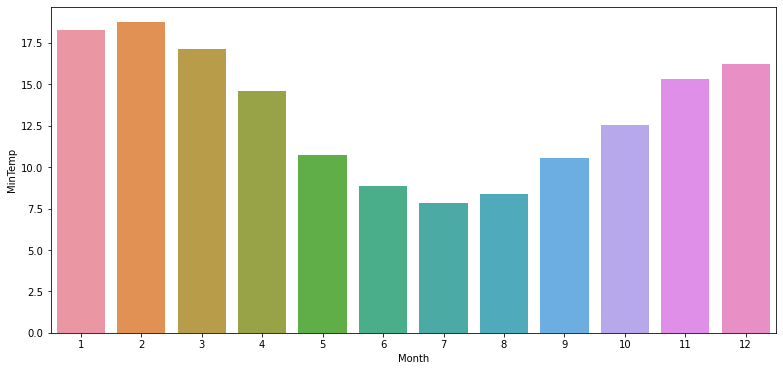

Plot : Month vs MaxTemp


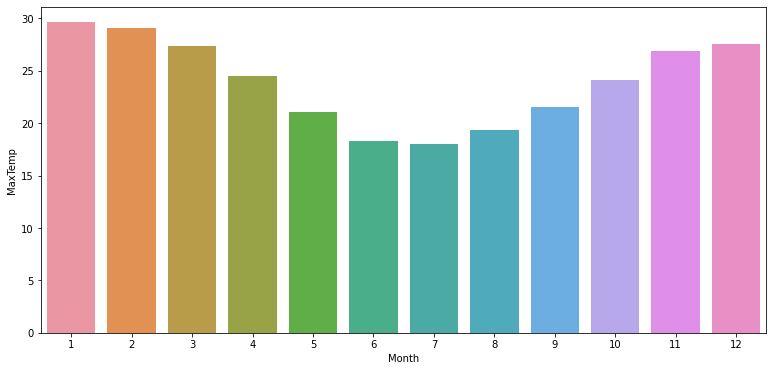

Plot : Month vs Rainfall


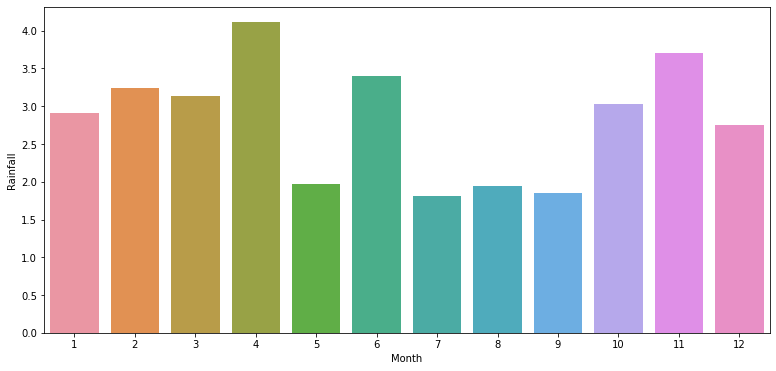

Plot : Month vs Evaporation


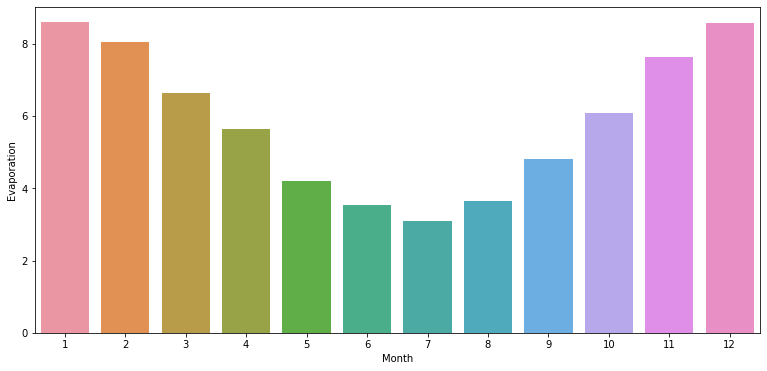

Plot : Month vs Sunshine


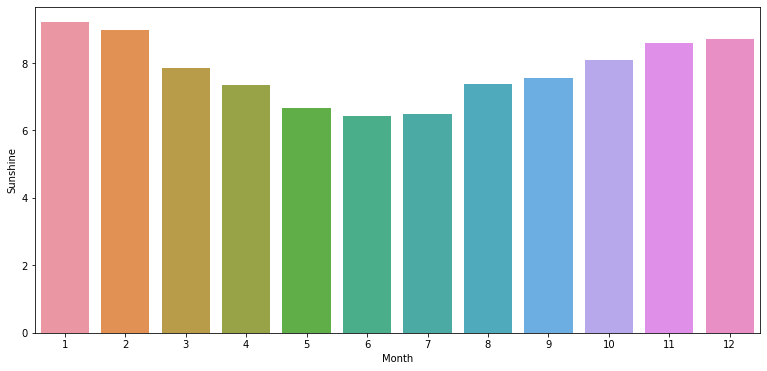

Plot : Month vs WindGustSpeed


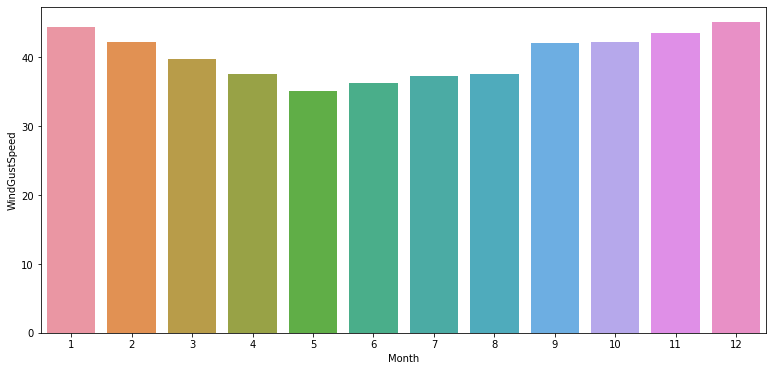

Plot : Month vs WindSpeed9am


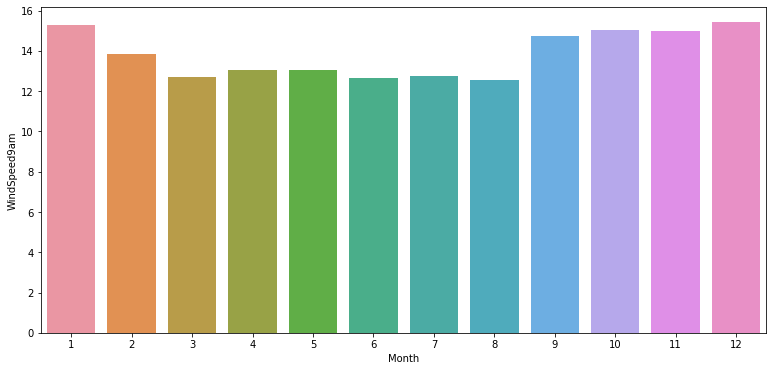

Plot : Month vs WindSpeed3pm


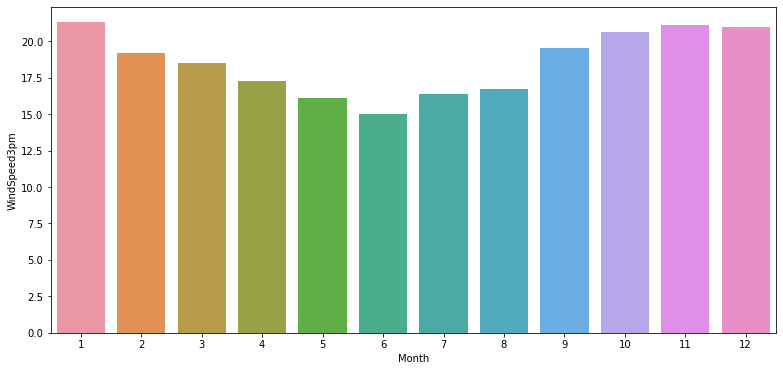

Plot : Month vs Humidity9am


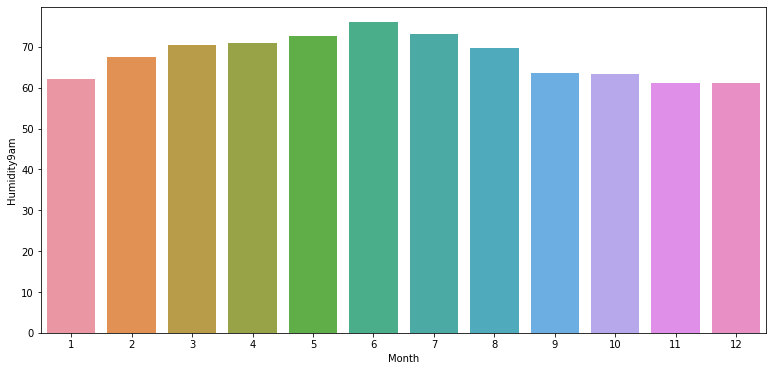

Plot : Month vs Humidity3pm


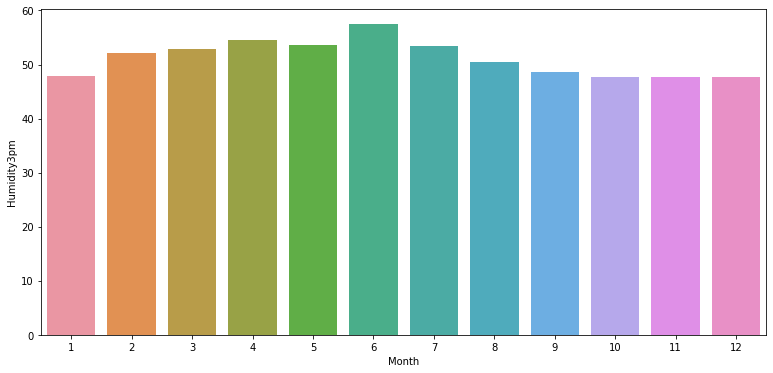

Plot : Month vs Pressure9am


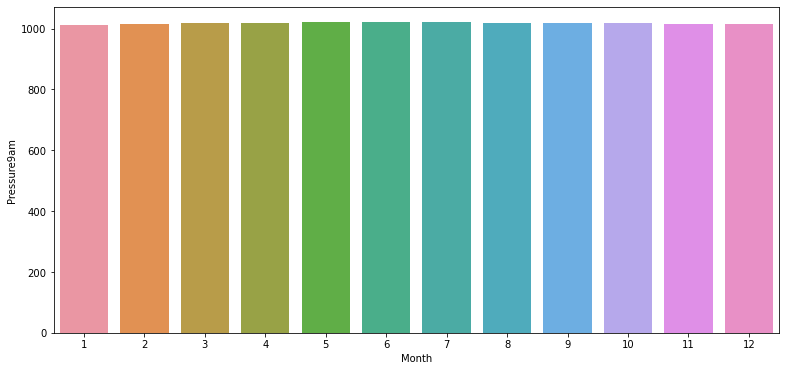

Plot : Month vs Pressure3pm


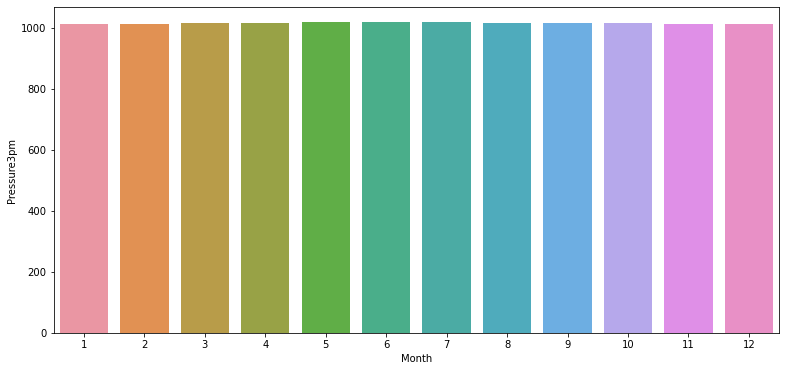

Plot : Month vs Cloud9am


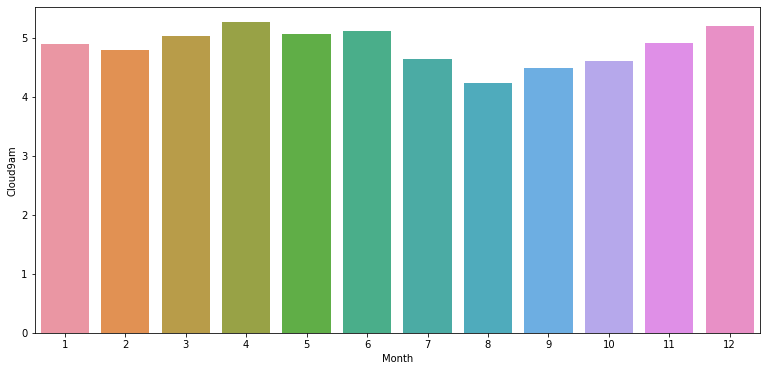

Plot : Month vs Cloud3pm


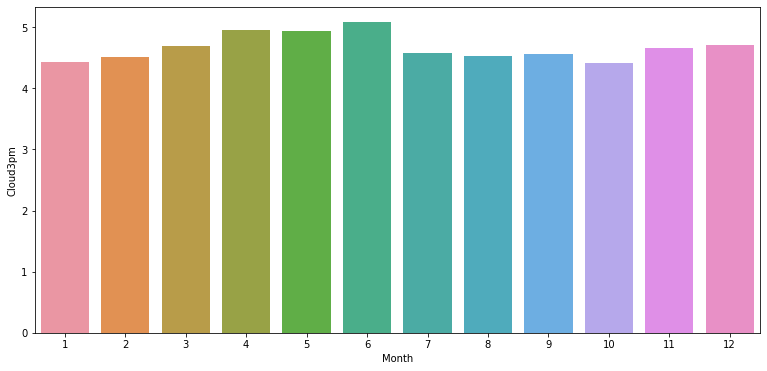

Plot : Month vs Temp9am


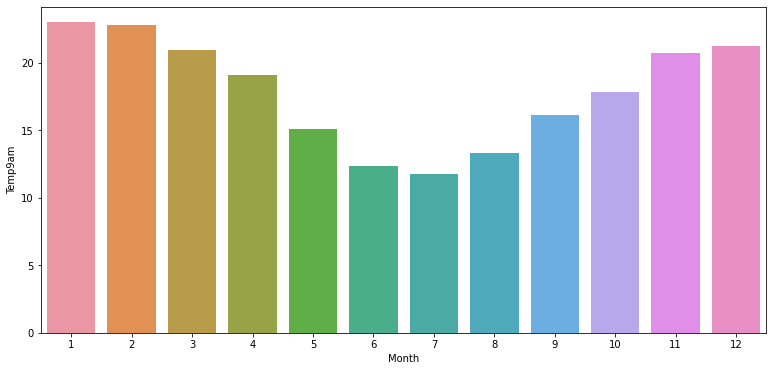

Plot : Month vs Temp3pm


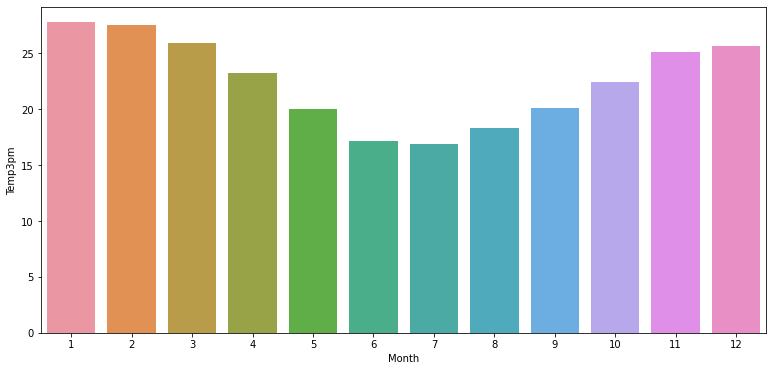

In [209]:
data = ['MinTemp',
  'MaxTemp',
  'Rainfall',
  'Evaporation',
  'Sunshine',
  'WindGustSpeed',
  'WindSpeed9am',
  'WindSpeed3pm',
  'Humidity9am',
  'Humidity3pm',
  'Pressure9am',
  'Pressure3pm',
  'Cloud9am',
  'Cloud3pm',
  'Temp9am',
  'Temp3pm']

for i in data:
    print('Plot : Month vs',i)
    plt.figure(figsize=(13,6))
    sns.barplot(x = pivot_table2.index.astype(int),y=i,data=pivot_table2)
    plt.show()

##### Observations :
    - June to August seems to be the coldest time in Australia, where the temperature is below 10°C.
    - Jan and Feb seem to be the hottest months where the temperature reaches almost 30°C.
    - March seems to be the month that receives the highest rainfall and July to Sept. the least.
    - Evapotration seems to be the high from November to February, peaking out in Dec and Jan and lowest in July.
    - We see the longest hrs of sunshine in Jan and feb and lowest between May to July.
    - We see Wind Gust Speed to be Highest in the Months of Nov to Feb and lowest in May, June.
    - Wind Speeds are High between the Months Sept to January and lowest in June.
    - Humidity seems to be highest in the month of June and  lowest in Nov, Dec.
    - Pressure looks to be the highest between May to July and lowest in Dec, Jan.
    - April,May,June months are cloudy.

In [22]:
pt4 = df.pivot_table(values = 'Rainfall',index = ['Location'])

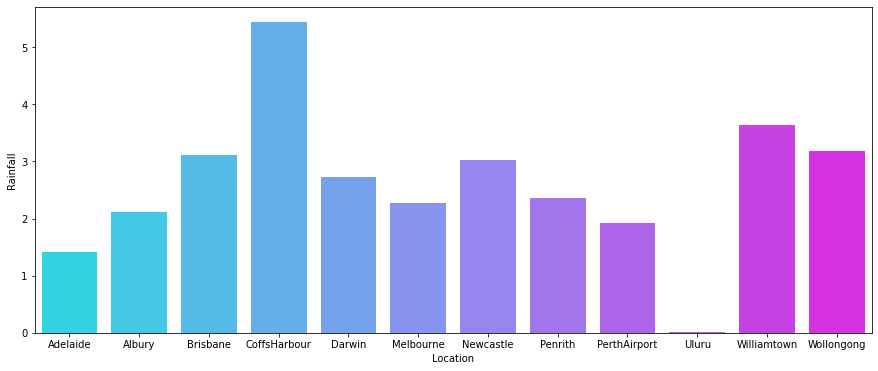

In [212]:
plt.figure(figsize=(15,6))
fig = sns.barplot(data = pt4, x=pt4.index, y='Rainfall', palette='cool')
plt.show()

From Above, we see that Coffs Harbour receives the highest rainfall and Uluru the lowest.

### Checking Skewness

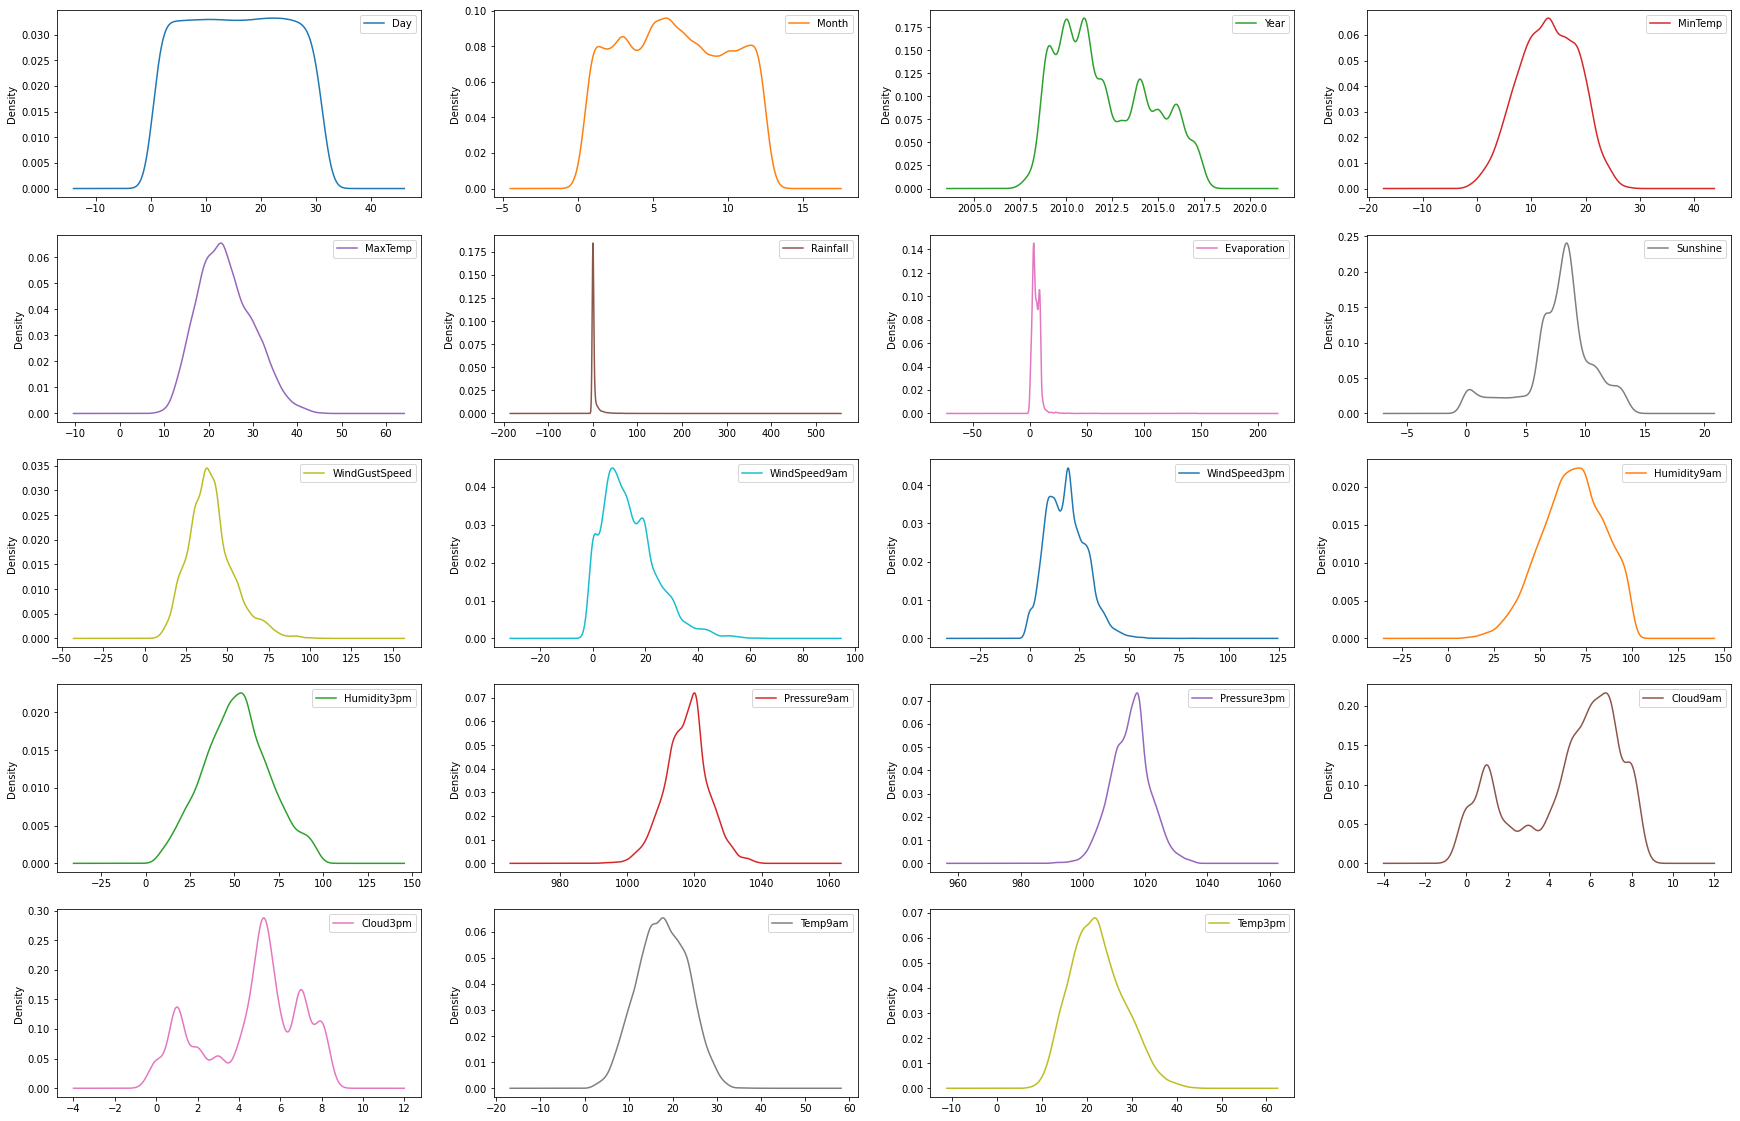

In [24]:
df.plot(kind = 'density',subplots=True,layout=(5,4),figsize=(30,20),sharex=False)
plt.show()

In [25]:
df.skew()

Day               0.004260
Month             0.039388
Year              0.418663
MinTemp          -0.089385
MaxTemp           0.382165
Rainfall         13.216090
Evaporation      10.896323
Sunshine         -0.779339
WindGustSpeed     0.748866
WindSpeed9am      0.962779
WindSpeed3pm      0.506925
Humidity9am      -0.262759
Humidity3pm       0.107741
Pressure9am      -0.057326
Pressure3pm      -0.041189
Cloud9am         -0.647813
Cloud3pm         -0.484458
Temp9am          -0.013968
Temp3pm           0.398790
dtype: float64

Setting Skewness Threshold as +/- 1, we see high skewness in Evaporation and Rainfall.

### Checking Outliers

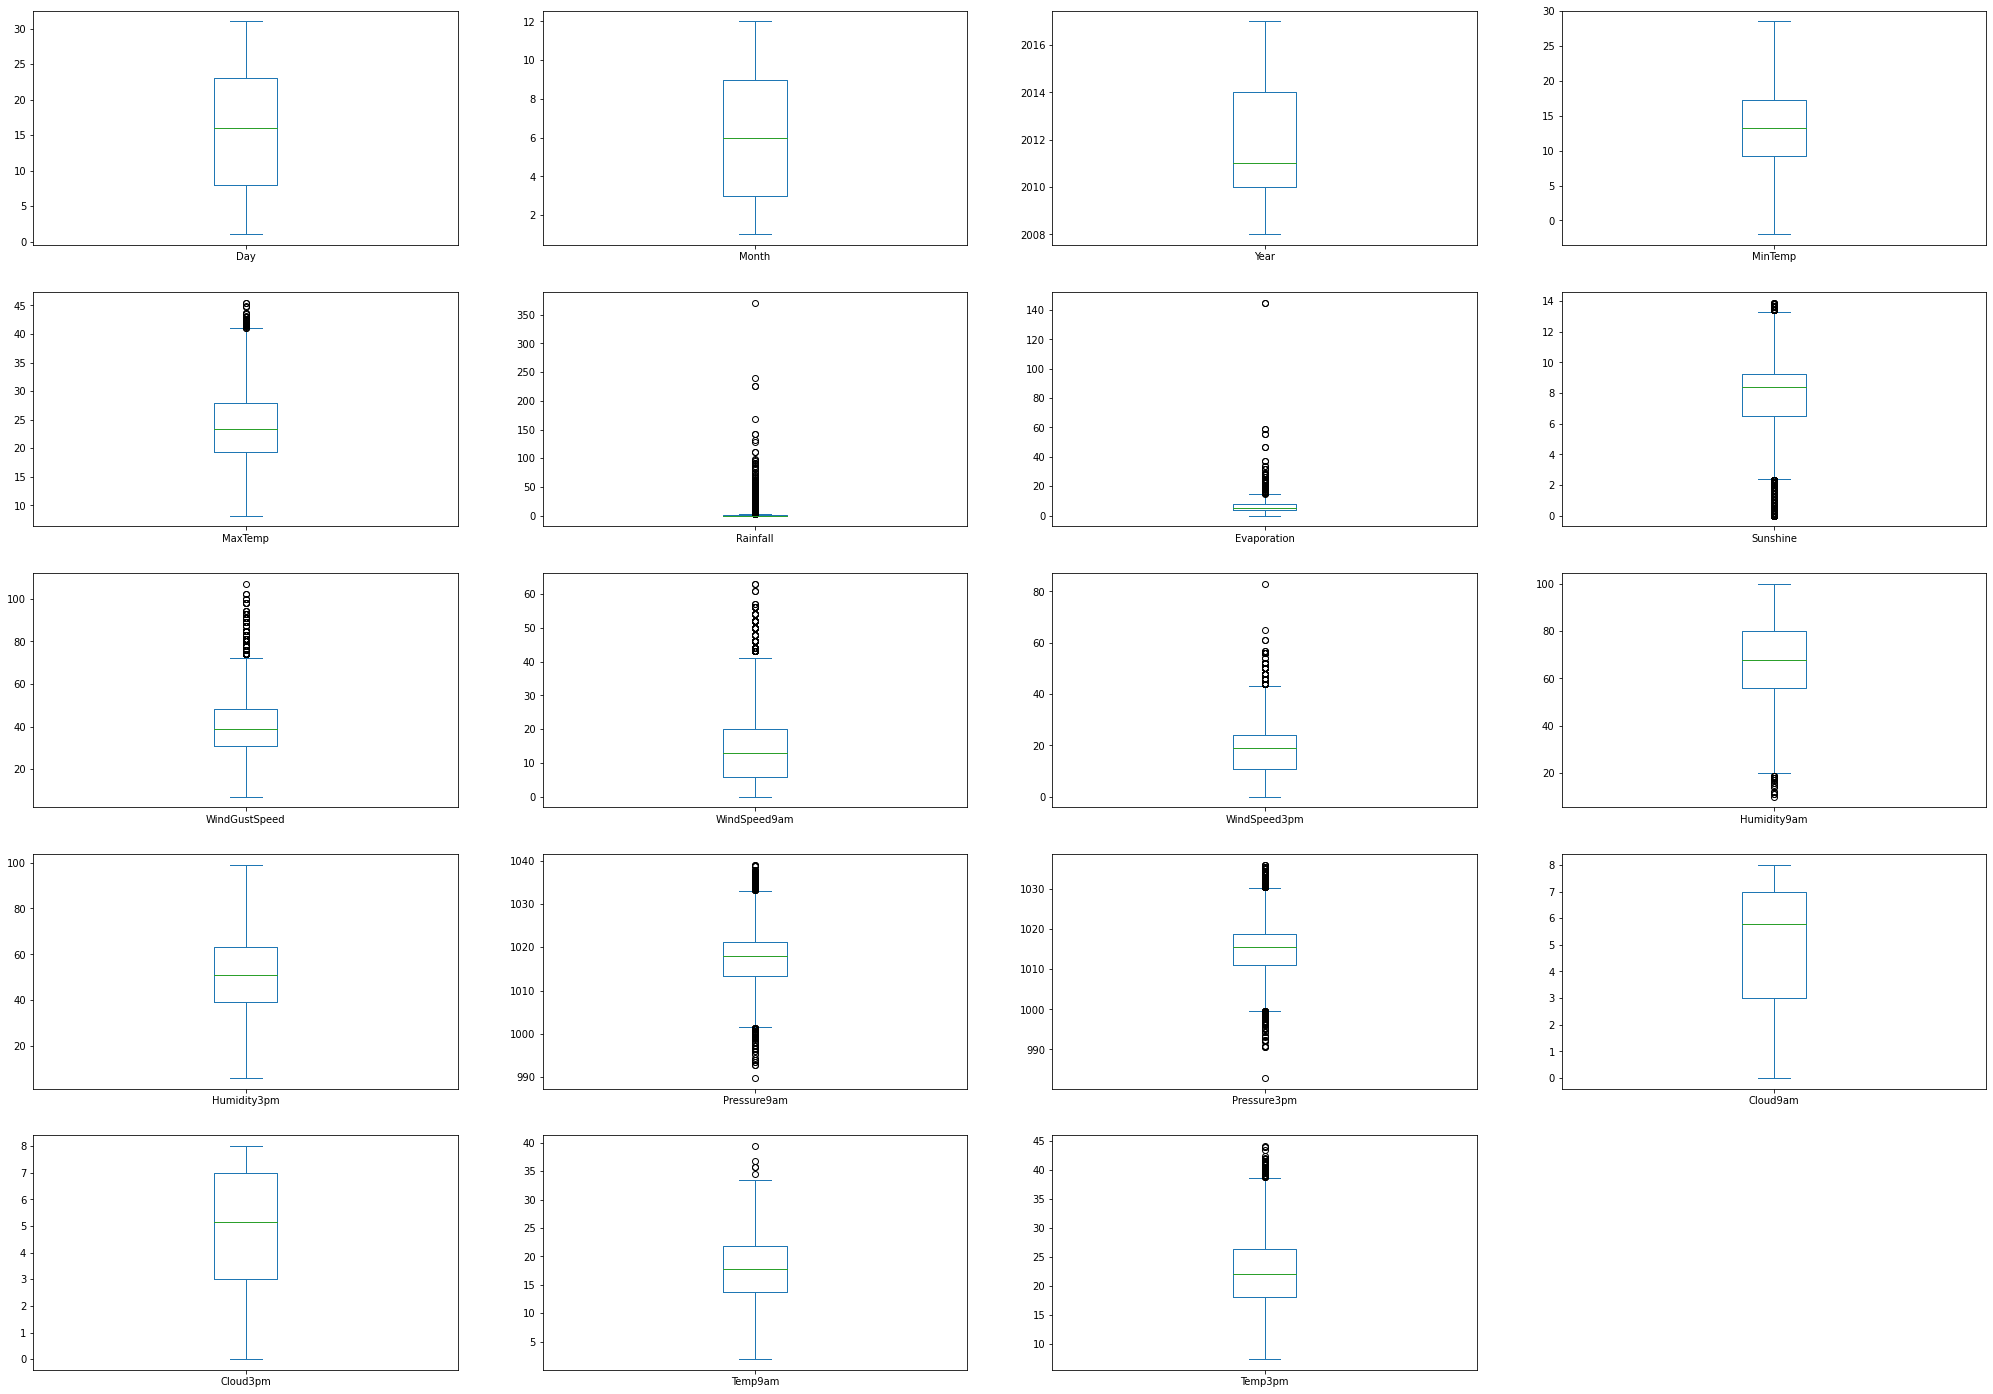

In [26]:
df.plot(kind='box',subplots=True,layout=(5,4),figsize=(35,25),sharex=True)
plt.show()

We see presence of outliers in Rainfall,Evaporation, Wind Gustspeed, wind speed at 9am, pressure at 9am, pressure at 3pm and Temp 9am

### Encoding Categorical Variables

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [28]:
for i in cat_columns:
    df[i] = le.fit_transform(df[i])
df

,Day,Month,Year,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,1,12,2008,1,13.4,22.900000,0.6,8.569709,8.719174,13,44.000000,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,5.334247,16.9,21.8,0,0
1,2,12,2008,1,7.4,25.100000,0.0,8.569709,8.719174,14,44.000000,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,6.373961,5.334247,17.2,24.3,0,0
2,3,12,2008,1,12.9,25.700000,0.0,8.569709,8.719174,15,46.000000,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,6.373961,2.000000,21.0,23.2,0,0
3,4,12,2008,1,9.2,28.000000,0.0,8.569709,8.719174,4,24.000000,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,6.373961,5.334247,18.1,26.5,0,0
4,5,12,2008,1,17.5,32.300000,1.0,8.569709,8.719174,13,41.000000,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,21,6,2017,9,2.8,23.400000,0.0,3.531983,6.427104,0,31.000000,9,1,13.0,11.0,51.0,24.0,1024.6,1020.3,6.000000,5.285714,10.1,22.4,0,0
8421,22,6,2017,9,3.6,25.300000,0.0,3.531983,6.427104,6,22.000000,9,3,13.0,9.0,56.0,21.0,1023.5,1019.1,6.000000,5.285714,10.9,24.5,0,0
8422,23,6,2017,9,5.4,26.900000,0.0,3.531983,6.427104,3,37.000000,9,14,9.0,9.0,53.0,24.0,1021.0,1016.8,6.000000,5.285714,12.5,26.1,0,0
8423,24,6,2017,9,7.8,27.000000,0.0,3.531983,6.427104,9,28.000000,10,3,13.0,7.0,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0,0,0


### Removing outliers

In [29]:
from scipy.stats import zscore

In [30]:
[(np.abs(zscore(df))<3).all()]

[Day               True
 Month             True
 Year              True
 Location          True
 MinTemp           True
 MaxTemp          False
 Rainfall         False
 Evaporation      False
 Sunshine          True
 WindGustDir       True
 WindGustSpeed    False
 WindDir9am        True
 WindDir3pm        True
 WindSpeed9am     False
 WindSpeed3pm     False
 Humidity9am      False
 Humidity3pm       True
 Pressure9am      False
 Pressure3pm      False
 Cloud9am          True
 Cloud3pm          True
 Temp9am          False
 Temp3pm          False
 RainToday         True
 RainTomorrow      True
 dtype: bool]

According to zscore we see presence of outliers in 'MaxTemp','Rainfall','Evaporation','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Pressure9am','Pressure3pm','Temp9am','Temp3pm'

In [31]:
z = np.abs(zscore(df))
z.shape

(8425, 25)

In [32]:
df = df[(z<3).all(axis=1)]
df.shape

(8005, 25)

### Percentage Data Loss

In [33]:
percentage_loss = (8425-8005)/8425*100
percentage_loss

4.985163204747774

### Checking Correlation

In [34]:
df.corr()

,Day,Month,Year,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Day,1.000000,-0.002943,-0.003096,-0.004151,0.009544,0.017261,-0.014446,0.003363,0.002745,0.015986,-0.005461,-0.007415,-0.001573,-0.009260,-0.009019,0.007615,0.013324,-0.014022,-0.010644,-0.008937,-0.003153,0.010728,0.015675,-0.016989,-0.013215
Month,-0.002943,1.000000,-0.092562,-0.085964,-0.246367,-0.164901,0.003989,-0.101442,-0.009980,0.037659,0.050779,-0.019595,0.029548,0.032043,0.041507,-0.113067,-0.072666,0.022925,0.016946,-0.028312,-0.010296,-0.166598,-0.178930,0.004108,0.000553
Year,-0.003096,-0.092562,1.000000,0.481353,0.040695,0.121557,0.014333,0.263496,0.091668,-0.046502,-0.034773,-0.015250,-0.015450,-0.095013,-0.068661,0.107069,-0.025183,0.045412,0.026662,-0.022206,-0.016233,0.087254,0.135291,-0.008940,-0.002543
Location,-0.004151,-0.085964,0.481353,1.000000,0.118945,0.065106,0.026771,0.253075,0.081983,-0.027071,0.250045,-0.051314,-0.029733,0.237686,0.232158,0.003019,0.060998,-0.023580,-0.012045,0.040549,0.030076,0.119781,0.061432,0.003471,0.009889
MinTemp,0.009544,-0.246367,0.040695,0.118945,1.000000,0.718887,0.094092,0.513690,0.151222,-0.159184,0.244571,-0.040729,-0.135091,0.143859,0.189313,-0.128238,0.089143,-0.482017,-0.474521,0.062756,0.021594,0.888846,0.687570,0.061366,0.091767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Cloud3pm,-0.003153,-0.010296,-0.016233,0.030076,0.021594,-0.251112,0.173254,-0.064486,-0.522189,0.105506,0.055207,0.079599,0.051273,0.038483,0.002115,0.297451,0.418751,-0.066122,-0.012482,0.578951,1.000000,-0.143463,-0.291298,0.214066,0.319497
Temp9am,0.010728,-0.166598,0.087254,0.119781,0.888846,0.865003,-0.029975,0.568604,0.347487,-0.192577,0.214860,-0.101192,-0.149130,0.108662,0.193695,-0.370928,-0.116178,-0.462709,-0.490198,-0.150461,-0.143463,1.000000,0.834920,-0.093932,-0.020250
Temp3pm,0.015675,-0.178930,0.135291,0.061432,0.687570,0.974961,-0.142502,0.554182,0.478374,-0.258313,0.114223,-0.218196,-0.184651,-0.001750,0.072391,-0.377179,-0.478841,-0.332235,-0.418634,-0.250993,-0.291298,0.834920,1.000000,-0.228283,-0.191173
RainToday,-0.016989,0.004108,-0.008940,0.003471,0.061366,-0.218689,0.689051,-0.124397,-0.216007,0.115194,0.073907,0.151840,0.099532,0.046002,0.022853,0.357072,0.341272,-0.098805,-0.029649,0.226554,0.214066,-0.093932,-0.228283,1.000000,0.293683


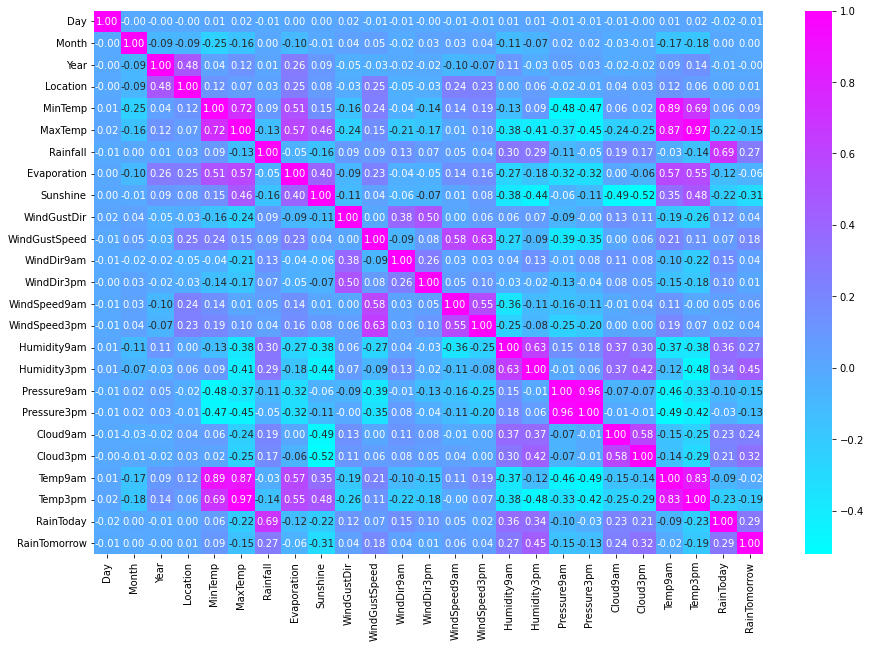

In [35]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap='cool')
plt.show()

We see that the features have both + and - correlations with the Target Varriable.

### Splitting the dataframe into Features and Target

In [40]:
x = df.drop('RainTomorrow',axis=1)
x.shape

(8005, 24)

In [41]:
y = df['RainTomorrow']
y.shape

(8005,)

### Removing skewness using Power_transform

In [42]:
from sklearn.preprocessing import power_transform

In [43]:
X = power_transform(x)
X = pd.DataFrame(X,columns=x.columns)
X

,Day,Month,Year,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,-1.886116,1.524833,0.0,-1.568075,0.062770,-0.073205,0.619534,1.040364,0.271319,1.102122,0.434295,1.164594,1.340545,0.788523,0.678123,0.148156,-1.678426,-1.666547,0.0,1.378521,0.254819,-0.132019,-0.024337,-0.542458
1,-1.703955,1.524833,0.0,-1.568075,-1.054455,0.289379,-0.693601,1.040364,0.271319,1.275090,0.434295,-0.220466,1.536858,-0.974762,0.481719,-1.430440,-1.492337,-1.191790,0.0,0.596905,0.254819,-0.078277,0.394723,-0.542458
2,-1.537724,1.524833,0.0,-1.568075,-0.029865,0.385134,-0.693601,1.040364,0.271319,1.444968,0.578912,1.164594,1.536858,0.705023,0.870037,-1.749514,-1.189543,-1.682921,0.0,0.596905,-1.161865,0.600797,0.213416,-0.542458
3,-1.382416,1.524833,0.0,-1.568075,-0.717857,0.740970,-0.693601,1.040364,0.271319,-0.667443,-1.251343,0.412256,-1.874578,-0.055054,-0.955139,-1.375998,-2.063072,-0.046644,0.0,0.596905,0.254819,0.082829,0.744184,-0.542458
4,-1.235291,1.524833,0.0,-1.568075,0.819902,1.364309,0.977529,1.040364,0.271319,1.102122,0.210949,-1.553170,-0.113571,-0.532136,0.280315,0.847341,-1.011664,-1.159056,0.0,0.891345,1.535808,0.029147,1.224885,-0.542458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8000,0.634352,-0.047644,0.0,1.015989,-1.923143,0.010863,-0.693601,-0.654230,-0.585397,-1.759305,-0.600773,0.412256,-1.575668,0.153831,-0.709027,-1.042262,-1.553966,1.097352,0.0,0.425119,0.232550,-1.356617,0.078558,-0.542458
8001,0.735081,-0.047644,0.0,1.015989,-1.770899,0.321439,-0.693601,-0.654230,-0.585397,-0.227681,-1.454245,0.412256,-1.047352,0.153831,-0.955139,-0.755384,-1.741298,0.917657,0.0,0.425119,0.232550,-1.211806,0.427198,-0.542458
8002,0.834640,-0.047644,0.0,1.015989,-1.430356,0.572933,-0.693601,-0.654230,-0.585397,-0.904887,-0.100182,0.412256,1.340545,-0.281820,-0.955139,-0.928433,-1.553966,0.509154,0.0,0.425119,0.232550,-0.922842,0.681875,-0.542458
8003,0.933092,-0.047644,0.0,1.015989,-0.979529,0.588367,-0.693601,-0.654230,-0.585397,0.372827,-0.869471,0.608478,-1.047352,0.153831,-1.215996,-1.042262,-1.553966,0.247636,0.0,-0.825947,-1.161865,-0.454923,0.666215,-0.542458


In [44]:
X.skew()

Day             -0.213410
Month           -0.149845
Year             0.000000
Location        -0.184348
MinTemp         -0.104421
MaxTemp         -0.014636
Rainfall         0.914735
Evaporation     -0.048714
Sunshine        -0.135788
WindGustDir     -0.265292
WindGustSpeed    0.000732
WindDir9am      -0.187063
WindDir3pm      -0.240066
WindSpeed9am    -0.111263
WindSpeed3pm    -0.073727
Humidity9am     -0.065306
Humidity3pm     -0.037903
Pressure9am      0.000144
Pressure3pm      0.000000
Cloud9am        -0.438232
Cloud3pm        -0.303917
Temp9am         -0.056274
Temp3pm         -0.013400
RainToday        1.301248
dtype: float64

We see that the skewness for all the features is within the threshold. The skewness for RainToday shows to be higher but it can be ignored as it is a categorical varriable.

### VIF

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [46]:
def calculate_vif(dataset):
    vif = pd.DataFrame()
    vif['Features'] = dataset.columns
    vif['VIF_Values'] = [variance_inflation_factor(dataset.values,i)for i in range(dataset.shape[1])]
    return vif.sort_values(by='VIF_Values',ascending=False)

In [47]:
calculate_vif(X)

,Features,VIF_Values
22,Temp3pm,32.916963
5,MaxTemp,26.997539
21,Temp9am,17.551828
4,MinTemp,8.442270
16,Humidity3pm,5.197373
...,...,...
3,Location,1.218684
1,Month,1.172874
0,Day,1.003406
2,Year,NaN


Setting the threshold at 5, we see Temp3pm,MaxTemp,Temp9am above the threshold.

In [48]:
X['Temp_Difference'] = X['MaxTemp']-X['MinTemp']
X.drop(['MaxTemp','MinTemp'],axis=1,inplace=True)

In [49]:
calculate_vif(X)

,Features,VIF_Values
20,Temp3pm,16.171203
19,Temp9am,14.364579
14,Humidity3pm,5.087800
4,Rainfall,4.814792
21,RainToday,4.387950
...,...,...
3,Location,1.208808
1,Month,1.169868
0,Day,1.003347
2,Year,NaN


In [50]:
X['Temp_diff_9am3pm'] = X['Temp3pm']-X['Temp9am']
X['Humidity_diff_9am3pm'] = X['Humidity3pm']-X['Humidity9am']
X.drop(['Temp3pm','Temp9am','Humidity3pm','Humidity9am'],axis=1,inplace=True)

In [51]:
calculate_vif(X)

,Features,VIF_Values
4,Rainfall,4.742884
19,Temp_diff_9am3pm,4.441156
17,RainToday,4.384571
18,Temp_Difference,3.150610
20,Humidity_diff_9am3pm,2.639723
...,...,...
3,Location,1.174847
1,Month,1.090849
0,Day,1.001914
2,Year,NaN


We see that all the values are with in the set threshold but we could further reduce the dimentionality by finding the difference for Pressure,WindSpeed and Clouds as well.

In [52]:
X['Pressure_diff_9am3pm'] = X['Pressure3pm']-X['Pressure9am']
X['WindSpeed_diff_9am3pm'] = X['WindSpeed3pm']-X['WindSpeed9am']
X['Clouds_diff_9am3pm'] = X['Cloud3pm']-X['Cloud9am']
X.drop(['Pressure3pm','Pressure9am','Cloud3pm','Cloud9am','WindSpeed3pm','WindSpeed9am'],axis=1,inplace=True)

In [53]:
X

,Day,Month,Year,Location,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,RainToday,Temp_Difference,Temp_diff_9am3pm,Humidity_diff_9am3pm,Pressure_diff_9am3pm,WindSpeed_diff_9am3pm,Clouds_diff_9am3pm
0,-1.886116,1.524833,0.0,-1.568075,0.619534,1.040364,0.271319,1.102122,0.434295,1.164594,1.340545,-0.542458,-0.135975,0.107682,-1.826582,1.666547,-0.110400,-1.123702
1,-1.703955,1.524833,0.0,-1.568075,-0.693601,1.040364,0.271319,1.275090,0.434295,-0.220466,1.536858,-0.542458,1.343835,0.473000,-0.061897,1.191790,1.456481,-0.342086
2,-1.537724,1.524833,0.0,-1.568075,-0.693601,1.040364,0.271319,1.444968,0.578912,1.164594,1.536858,-0.542458,0.414999,-0.387381,0.559970,1.682921,0.165014,-1.758770
3,-1.382416,1.524833,0.0,-1.568075,-0.693601,1.040364,0.271319,-0.667443,-1.251343,0.412256,-1.874578,-0.542458,1.458827,0.661354,-0.687074,0.046644,-0.900085,-0.342086
4,-1.235291,1.524833,0.0,-1.568075,0.977529,1.040364,0.271319,1.102122,0.210949,-1.553170,-0.113571,-0.542458,0.544407,1.195738,-1.859005,1.159056,0.812452,0.644463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8000,0.634352,-0.047644,0.0,1.015989,-0.693601,-0.654230,-0.585397,-1.759305,-0.600773,0.412256,-1.575668,-0.542458,1.934006,1.435175,-0.511704,-1.097352,-0.862858,-0.192569
8001,0.735081,-0.047644,0.0,1.015989,-0.693601,-0.654230,-0.585397,-0.227681,-1.454245,0.412256,-1.047352,-0.542458,2.092338,1.639003,-0.985913,-0.917657,-1.108971,-0.192569
8002,0.834640,-0.047644,0.0,1.015989,-0.693601,-0.654230,-0.585397,-0.904887,-0.100182,0.412256,1.340545,-0.542458,2.003289,1.604717,-0.625533,-0.509154,-0.673320,-0.192569
8003,0.933092,-0.047644,0.0,1.015989,-0.693601,-0.654230,-0.585397,0.372827,-0.869471,0.608478,-1.047352,-0.542458,1.567897,1.121139,-0.511704,-0.247636,-1.369827,-0.335918


### Checking if the Dataset is Balanced

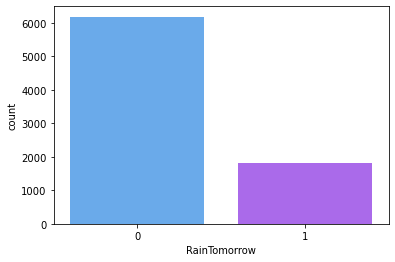

In [54]:
sns.countplot(y,palette='cool')
plt.show()

We see that the dataset is Imbalanced and would have to be Balanced.

### Balancing Dataset

In [55]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()

In [56]:
X,y = sm.fit_resample(X,y)
X.shape,y.shape

((12362, 18), (12362,))

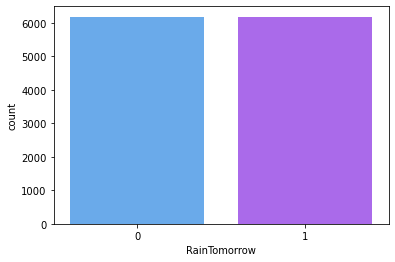

In [57]:
sns.countplot(y,palette='cool')
plt.show()

The dataset is now balanced

### Scalling the Data using StandardScaler

In [58]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [59]:
dfx = sc.fit_transform(X)
X = pd.DataFrame(dfx,columns=X.columns)
X

,Day,Month,Year,Location,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,RainToday,Temp_Difference,Temp_diff_9am3pm,Humidity_diff_9am3pm,Pressure_diff_9am3pm,WindSpeed_diff_9am3pm,Clouds_diff_9am3pm
0,-1.921994,1.570015,0.0,-1.609086,0.389060,1.095387,0.470499,1.108628,0.329886,1.175391,1.380363,-0.670141,0.035970,0.391239,-2.237420,1.618313,-0.116859,-1.316935
1,-1.735809,1.570015,0.0,-1.609086,-0.836688,1.095387,0.470499,1.287499,0.329886,-0.256106,1.583353,-0.670141,2.061282,1.045649,-0.183491,1.133329,1.625979,-0.443972
2,-1.565906,1.570015,0.0,-1.609086,-0.836688,1.095387,0.470499,1.463174,0.474196,1.175391,1.583353,-0.670141,0.790049,-0.495589,0.540306,1.635040,0.189484,-2.026224
3,-1.407167,1.570015,0.0,-1.609086,-0.836688,1.095387,0.470499,-0.721321,-1.352183,0.397830,-1.944129,-0.670141,2.218664,1.383056,-0.911139,-0.036484,-0.995223,-0.443972
4,-1.256792,1.570015,0.0,-1.609086,0.723230,1.095387,0.470499,1.108628,0.107013,-1.633490,-0.123218,-0.670141,0.967161,2.340321,-2.275158,1.099890,0.909627,0.657874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12357,-0.922911,-0.240303,0.0,-0.207858,-0.836688,-1.116336,-1.731108,-0.966867,0.461269,-1.014021,-0.123218,-0.670141,-0.403666,0.350114,-0.206506,-0.635522,-0.706918,0.107181
12358,-0.340935,-1.389721,0.0,1.594937,1.489793,0.944456,0.572604,0.354447,0.888922,0.188183,0.324264,1.493451,-0.693188,-0.283381,-0.342121,-0.220205,-0.852113,0.107181
12359,-1.372742,1.225245,0.0,1.240034,1.397856,-0.897173,-1.967993,-1.665066,0.957604,0.674102,-1.209616,1.493451,-1.645114,-1.065850,0.167812,0.112791,1.447734,0.049310
12360,0.235759,-1.635473,0.0,1.594937,-0.836688,1.039578,0.631084,-0.373965,0.121505,0.314626,0.236348,-0.670141,-1.282453,-1.150246,0.570909,1.115292,-1.044072,-0.363893


In [60]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [82]:
max_accuracy = 0
max_random_state = 0
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=i)
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    accuracy=accuracy_score(y_test,pred)
    if accuracy > max_accuracy:
        max_accuracy = accuracy
        max_random_state = i
print('The best accuracy is ', max_accuracy ,'for random_state', max_random_state)

The best accuracy is  0.7522243192235104 for random_state 8


In [84]:
lr = LogisticRegression()
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=8)
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
accuracy = accuracy_score(y_test,pred)
print('Base Model Report :',lr)
print('Accuracy Score',accuracy)
print(classification_report(y_test,pred))

Base Model Report : LogisticRegression()
Accuracy Score 0.7522243192235104
              precision    recall  f1-score   support

           0       0.75      0.75      0.75      1841
           1       0.75      0.76      0.76      1868

    accuracy                           0.75      3709
   macro avg       0.75      0.75      0.75      3709
weighted avg       0.75      0.75      0.75      3709



In [85]:
from sklearn.model_selection import cross_val_score

In [96]:
for j in range(2,103,10):
    cv = cross_val_score(lr,X,y,cv=j)
    cv_score = cv.mean()
    print('at',j,'cross validation score is',cv_score,'and the accuracy is',accuracy)

at 2 cross validation score is 0.7019090762012619 and the accuracy is 0.7522243192235104
at 12 cross validation score is 0.7130732879442775 and the accuracy is 0.7522243192235104
at 22 cross validation score is 0.7206087075870319 and the accuracy is 0.7522243192235104
at 32 cross validation score is 0.7234058487635726 and the accuracy is 0.7522243192235104
at 42 cross validation score is 0.7253356063975227 and the accuracy is 0.7522243192235104
at 52 cross validation score is 0.7275388733877193 and the accuracy is 0.7522243192235104
at 62 cross validation score is 0.7273403306856866 and the accuracy is 0.7522243192235104
at 72 cross validation score is 0.7282118409719389 and the accuracy is 0.7522243192235104
at 82 cross validation score is 0.7282975286706509 and the accuracy is 0.7522243192235104
at 92 cross validation score is 0.7292516884178144 and the accuracy is 0.7522243192235104
at 102 cross validation score is 0.7298608509926121 and the accuracy is 0.7522243192235104


In [97]:
def Model(model):
    model.fit(x_test,y_test)
    pred = model.predict(x_test)
    accuracy = accuracy_score(y_test,pred)*100
    cv = cross_val_score(model,X,y,cv=102)
    cv_score = cv.mean()*100
    print('Report for model', model)
    print('The Accuracy Score is', accuracy)
    print('Confussion Matrix :','\n',confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print('Cross Validation Score is ', cv_score)
    print()
    print('Difference between accuracy score and cv is',accuracy-cv_score)

In [98]:
Model(lr)

Report for model LogisticRegression()
The Accuracy Score is 74.84497169048261
Confussion Matrix : 
 [[1377  464]
 [ 469 1399]]
              precision    recall  f1-score   support

           0       0.75      0.75      0.75      1841
           1       0.75      0.75      0.75      1868

    accuracy                           0.75      3709
   macro avg       0.75      0.75      0.75      3709
weighted avg       0.75      0.75      0.75      3709

Cross Validation Score is  72.98608509926122

Difference between accuracy score and cv is 1.8588865912213919


In [99]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
Model(knn)

Report for model KNeighborsClassifier()
The Accuracy Score is 86.76193043947156
Confussion Matrix : 
 [[1450  391]
 [ 100 1768]]
              precision    recall  f1-score   support

           0       0.94      0.79      0.86      1841
           1       0.82      0.95      0.88      1868

    accuracy                           0.87      3709
   macro avg       0.88      0.87      0.87      3709
weighted avg       0.88      0.87      0.87      3709

Cross Validation Score is  84.50180776822314

Difference between accuracy score and cv is 2.2601226712484106


In [100]:
from sklearn.svm import SVC
svc = SVC()
Model(svc)

Report for model SVC()
The Accuracy Score is 84.60501482879482
Confussion Matrix : 
 [[1539  302]
 [ 269 1599]]
              precision    recall  f1-score   support

           0       0.85      0.84      0.84      1841
           1       0.84      0.86      0.85      1868

    accuracy                           0.85      3709
   macro avg       0.85      0.85      0.85      3709
weighted avg       0.85      0.85      0.85      3709

Cross Validation Score is  81.57504296936224

Difference between accuracy score and cv is 3.029971859432578


Report for model DecisionTreeClassifier()
The Accuracy Score is 100.0
Confussion Matrix : 
 [[1841    0]
 [   0 1868]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1841
           1       1.00      1.00      1.00      1868

    accuracy                           1.00      3709
   macro avg       1.00      1.00      1.00      3709
weighted avg       1.00      1.00      1.00      3709

Cross Validation Score is  86.7019453764435

Difference between accuracy score and cv is 13.298054623556496


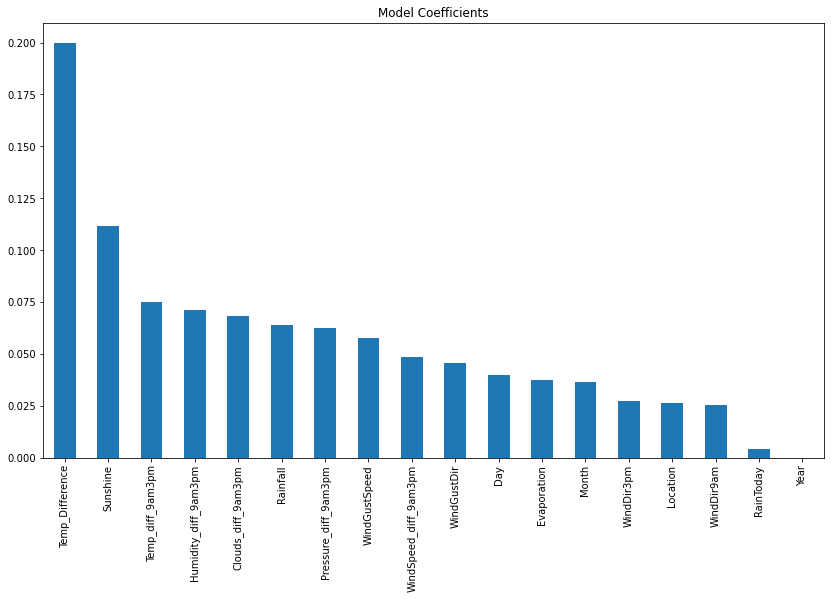

In [101]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
Model(dtc)
coef = pd.Series(dtc.feature_importances_,X.columns).sort_values(ascending=False)
coef.plot(kind= 'bar', title = 'Model Coefficients',figsize=(14,8))
plt.show()

Report for model RandomForestClassifier()
The Accuracy Score is 100.0
Confussion Matrix : 
 [[1841    0]
 [   0 1868]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1841
           1       1.00      1.00      1.00      1868

    accuracy                           1.00      3709
   macro avg       1.00      1.00      1.00      3709
weighted avg       1.00      1.00      1.00      3709

Cross Validation Score is  92.85818649367347

Difference between accuracy score and cv is 7.141813506326528


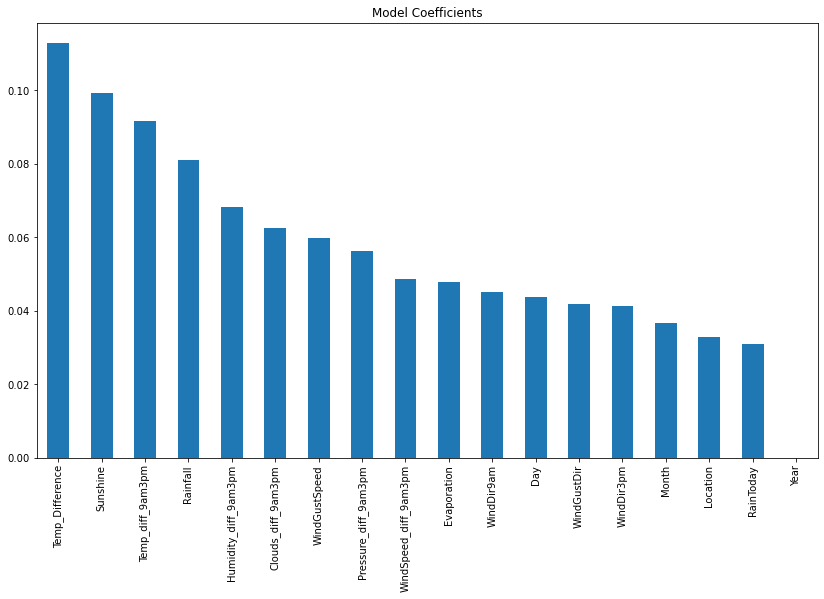

In [102]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
Model(rf)
coef = pd.Series(rf.feature_importances_,X.columns).sort_values(ascending=False)
coef.plot(kind= 'bar', title = 'Model Coefficients',figsize=(14,8))
plt.show()

Report for model ExtraTreesClassifier()
The Accuracy Score is 100.0
Confussion Matrix : 
 [[1841    0]
 [   0 1868]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1841
           1       1.00      1.00      1.00      1868

    accuracy                           1.00      3709
   macro avg       1.00      1.00      1.00      3709
weighted avg       1.00      1.00      1.00      3709

Cross Validation Score is  94.2951696326817

Difference between accuracy score and cv is 5.704830367318294


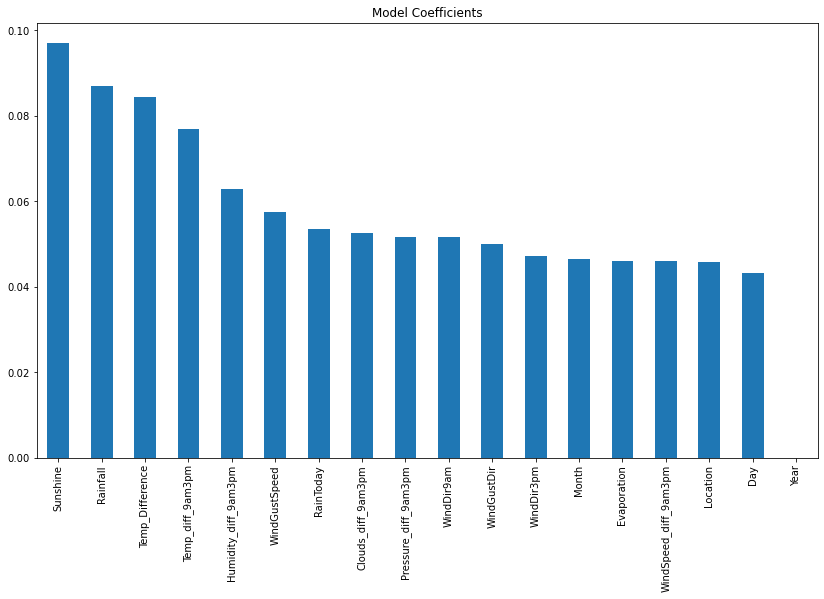

In [103]:
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier()
Model(et)
coef = pd.Series(et.feature_importances_,X.columns).sort_values(ascending=False)
coef.plot(kind= 'bar', title = 'Model Coefficients',figsize=(14,8))
plt.show()

Report for model AdaBoostClassifier()
The Accuracy Score is 80.23726071717444
Confussion Matrix : 
 [[1455  386]
 [ 347 1521]]
              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1841
           1       0.80      0.81      0.81      1868

    accuracy                           0.80      3709
   macro avg       0.80      0.80      0.80      3709
weighted avg       0.80      0.80      0.80      3709

Cross Validation Score is  76.32155693872184

Difference between accuracy score and cv is 3.9157037784525954


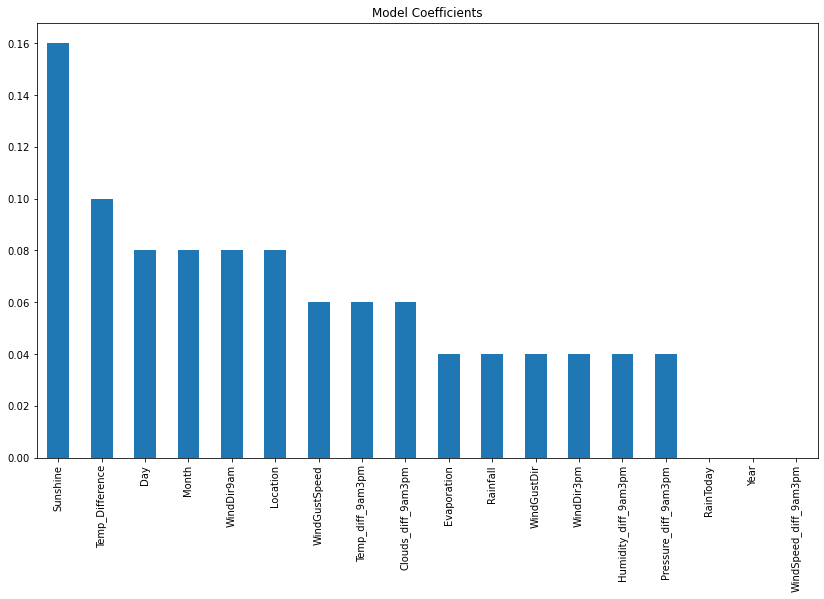

In [104]:
from sklearn.ensemble import AdaBoostClassifier
ad = AdaBoostClassifier()
Model(ad)
coef = pd.Series(ad.feature_importances_,X.columns).sort_values(ascending=False)
coef.plot(kind= 'bar', title = 'Model Coefficients',figsize=(14,8))
plt.show()

Report for model GradientBoostingClassifier()
The Accuracy Score is 86.16877864653544
Confussion Matrix : 
 [[1596  245]
 [ 268 1600]]
              precision    recall  f1-score   support

           0       0.86      0.87      0.86      1841
           1       0.87      0.86      0.86      1868

    accuracy                           0.86      3709
   macro avg       0.86      0.86      0.86      3709
weighted avg       0.86      0.86      0.86      3709

Cross Validation Score is  80.974401683177

Difference between accuracy score and cv is 5.194376963358437


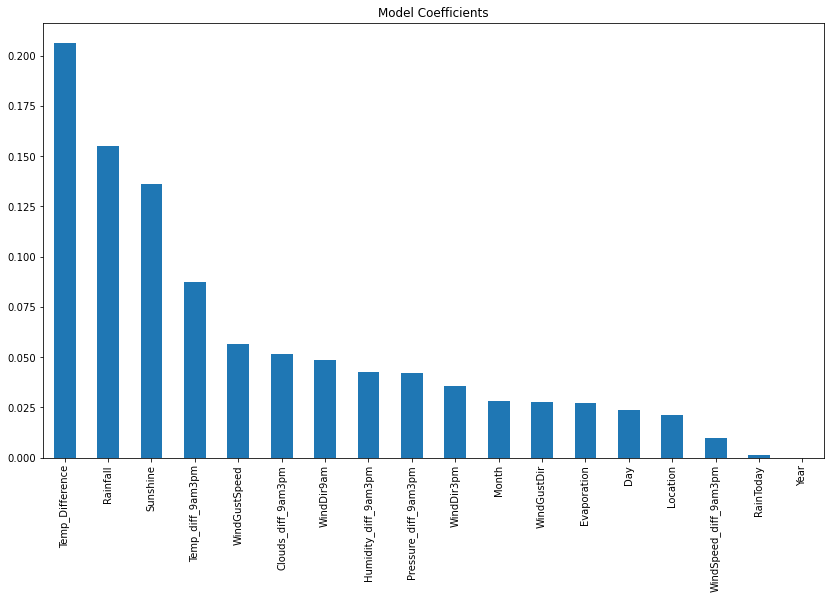

In [105]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
Model(gb)
coef = pd.Series(gb.feature_importances_,X.columns).sort_values(ascending=False)
coef.plot(kind= 'bar', title = 'Model Coefficients',figsize=(14,8))
plt.show()

### HyperParameter Tuning

In [107]:
from sklearn.model_selection import GridSearchCV

In [108]:
lr = LogisticRegression()

parameters = {'penalty':['l1', 'l2', 'elasticnet', 'none'],'C':[0.001,0.0011,0.01,0.1,1,10],'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
gcv = GridSearchCV(lr,parameters,cv=102,n_jobs=-1)
gcv.fit(x_train,y_train)
gcv.best_params_

{'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}

In [109]:
gcv.best_estimator_

LogisticRegression(C=0.1, solver='newton-cg')

In [113]:
lr = LogisticRegression(C=0.1, solver='newton-cg')
Model(lr)

Report for model LogisticRegression(C=0.1, solver='newton-cg')
The Accuracy Score is 74.87193313561606
Confussion Matrix : 
 [[1378  463]
 [ 469 1399]]
              precision    recall  f1-score   support

           0       0.75      0.75      0.75      1841
           1       0.75      0.75      0.75      1868

    accuracy                           0.75      3709
   macro avg       0.75      0.75      0.75      3709
weighted avg       0.75      0.75      0.75      3709

Cross Validation Score is  72.98608509926122

Difference between accuracy score and cv is 1.8858480363548438


In [126]:
knn = KNeighborsClassifier()
parameters = {'n_neighbors':list(range(5,15)),'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],'leaf_size':list(range(10,50,10))}
gcv = GridSearchCV(knn,parameters,cv=102,n_jobs=-1)
gcv.fit(x_train,y_train)
gcv.best_params_

{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 6}

In [127]:
gcv.best_estimator_

KNeighborsClassifier(leaf_size=10, n_neighbors=6)

In [128]:
knn = KNeighborsClassifier(leaf_size=10, n_neighbors=6)
Model(knn)

Report for model KNeighborsClassifier(leaf_size=10, n_neighbors=6)
The Accuracy Score is 86.68104610407119
Confussion Matrix : 
 [[1545  296]
 [ 198 1670]]
              precision    recall  f1-score   support

           0       0.89      0.84      0.86      1841
           1       0.85      0.89      0.87      1868

    accuracy                           0.87      3709
   macro avg       0.87      0.87      0.87      3709
weighted avg       0.87      0.87      0.87      3709

Cross Validation Score is  85.09275272227845

Difference between accuracy score and cv is 1.588293381792738


In [129]:
et = ExtraTreesClassifier()

parameters = {'n_estimators':list(range(50,501,50)),
             'criterion':["gini", "entropy"],
             'max_features':["auto", "sqrt", "log2"],
             'min_samples_split':[2,3,4,5,6,7,8,9]
             }
gcv = GridSearchCV(et,parameters,cv=102,n_jobs=-1)
gcv.fit(x_train,y_train)
gcv.best_params_

{'criterion': 'gini',
 'max_features': 'auto',
 'min_samples_split': 2,
 'n_estimators': 200}

In [130]:
gcv.best_estimator_

ExtraTreesClassifier(n_estimators=200)

In [133]:
et = ExtraTreesClassifier(n_estimators=200)
Model(et)

Report for model ExtraTreesClassifier(n_estimators=200)
The Accuracy Score is 100.0
Confussion Matrix : 
 [[1841    0]
 [   0 1868]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1841
           1       1.00      1.00      1.00      1868

    accuracy                           1.00      3709
   macro avg       1.00      1.00      1.00      3709
weighted avg       1.00      1.00      1.00      3709

Cross Validation Score is  94.23001825035665

Difference between accuracy score and cv is 5.76998174964335


In [138]:
ad = AdaBoostClassifier()
parameters = {'n_estimators':list(range(10,201,10)),'learning_rate':[0.001,0.01,1,10],'algorithm':['SAMME', 'SAMME.R']}
gcv = GridSearchCV(ad,parameters,cv=102)
gcv.fit(x_train,y_train)
gcv.best_params_

{'algorithm': 'SAMME.R', 'learning_rate': 1, 'n_estimators': 200}

In [139]:
gcv.best_estimator_

AdaBoostClassifier(learning_rate=1, n_estimators=200)

In [140]:
ad = AdaBoostClassifier(learning_rate=1, n_estimators=200)
Model(ad)

Report for model AdaBoostClassifier(learning_rate=1, n_estimators=200)
The Accuracy Score is 83.74224858452412
Confussion Matrix : 
 [[1535  312]
 [ 291 1571]]
              precision    recall  f1-score   support

           0       0.84      0.83      0.84      1847
           1       0.83      0.84      0.84      1862

    accuracy                           0.84      3709
   macro avg       0.84      0.84      0.84      3709
weighted avg       0.84      0.84      0.84      3709

Cross Validation Score is  79.49159341286985

Difference between accuracy score and cv is 4.250655171654273


### Final Model : KNeighborsClassifier with HyperParameter Tuning

In [141]:
knn = KNeighborsClassifier(leaf_size=10, n_neighbors=6)
Model(knn)

Report for model KNeighborsClassifier(leaf_size=10, n_neighbors=6)
The Accuracy Score is 85.41385818279859
Confussion Matrix : 
 [[1532  315]
 [ 226 1636]]
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1847
           1       0.84      0.88      0.86      1862

    accuracy                           0.85      3709
   macro avg       0.85      0.85      0.85      3709
weighted avg       0.85      0.85      0.85      3709

Cross Validation Score is  85.09275272227845

Difference between accuracy score and cv is 0.321105460520144


### AUC ROC Curve

In [142]:
from sklearn.metrics import plot_confusion_matrix

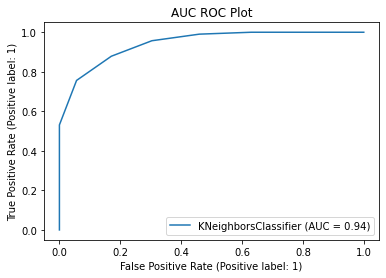

In [145]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(knn,x_test,y_test)
plt.title('AUC ROC Plot')
plt.show()

In [146]:
import pickle

file_name = 'Weather_Aus_Rain_Tomorrow.pkl'
pickle.dump(knn,open(file_name,'wb'))

### Predicting Rainfall

In [62]:
df

,Day,Month,Year,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,1,12,2008,1,13.4,22.900000,0.6,8.569709,8.719174,13,44.000000,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,5.334247,16.9,21.8,0,0
1,2,12,2008,1,7.4,25.100000,0.0,8.569709,8.719174,14,44.000000,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,6.373961,5.334247,17.2,24.3,0,0
2,3,12,2008,1,12.9,25.700000,0.0,8.569709,8.719174,15,46.000000,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,6.373961,2.000000,21.0,23.2,0,0
3,4,12,2008,1,9.2,28.000000,0.0,8.569709,8.719174,4,24.000000,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,6.373961,5.334247,18.1,26.5,0,0
4,5,12,2008,1,17.5,32.300000,1.0,8.569709,8.719174,13,41.000000,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,21,6,2017,9,2.8,23.400000,0.0,3.531983,6.427104,0,31.000000,9,1,13.0,11.0,51.0,24.0,1024.6,1020.3,6.000000,5.285714,10.1,22.4,0,0
8421,22,6,2017,9,3.6,25.300000,0.0,3.531983,6.427104,6,22.000000,9,3,13.0,9.0,56.0,21.0,1023.5,1019.1,6.000000,5.285714,10.9,24.5,0,0
8422,23,6,2017,9,5.4,26.900000,0.0,3.531983,6.427104,3,37.000000,9,14,9.0,9.0,53.0,24.0,1021.0,1016.8,6.000000,5.285714,12.5,26.1,0,0
8423,24,6,2017,9,7.8,27.000000,0.0,3.531983,6.427104,9,28.000000,10,3,13.0,7.0,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0,0,0


### Splitting the dataframe into x & y

In [63]:
x = df.drop('Rainfall',axis=1)
x.shape

(8005, 24)

In [64]:
y = df['Rainfall']
y.shape

(8005,)

### Removing skewness using Power_transform

In [65]:
from sklearn.preprocessing import power_transform

In [66]:
X = power_transform(x)
X = pd.DataFrame(X,columns=x.columns)
X

,Day,Month,Year,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,-1.886116,1.524833,0.0,-1.568075,0.062770,-0.073205,1.040364,0.271319,1.102122,0.434295,1.164594,1.340545,0.788523,0.678123,0.148156,-1.678426,-1.666547,0.0,1.378521,0.254819,-0.132019,-0.024337,-0.542458,-0.543229
1,-1.703955,1.524833,0.0,-1.568075,-1.054455,0.289379,1.040364,0.271319,1.275090,0.434295,-0.220466,1.536858,-0.974762,0.481719,-1.430440,-1.492337,-1.191790,0.0,0.596905,0.254819,-0.078277,0.394723,-0.542458,-0.543229
2,-1.537724,1.524833,0.0,-1.568075,-0.029865,0.385134,1.040364,0.271319,1.444968,0.578912,1.164594,1.536858,0.705023,0.870037,-1.749514,-1.189543,-1.682921,0.0,0.596905,-1.161865,0.600797,0.213416,-0.542458,-0.543229
3,-1.382416,1.524833,0.0,-1.568075,-0.717857,0.740970,1.040364,0.271319,-0.667443,-1.251343,0.412256,-1.874578,-0.055054,-0.955139,-1.375998,-2.063072,-0.046644,0.0,0.596905,0.254819,0.082829,0.744184,-0.542458,-0.543229
4,-1.235291,1.524833,0.0,-1.568075,0.819902,1.364309,1.040364,0.271319,1.102122,0.210949,-1.553170,-0.113571,-0.532136,0.280315,0.847341,-1.011664,-1.159056,0.0,0.891345,1.535808,0.029147,1.224885,-0.542458,-0.543229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8000,0.634352,-0.047644,0.0,1.015989,-1.923143,0.010863,-0.654230,-0.585397,-1.759305,-0.600773,0.412256,-1.575668,0.153831,-0.709027,-1.042262,-1.553966,1.097352,0.0,0.425119,0.232550,-1.356617,0.078558,-0.542458,-0.543229
8001,0.735081,-0.047644,0.0,1.015989,-1.770899,0.321439,-0.654230,-0.585397,-0.227681,-1.454245,0.412256,-1.047352,0.153831,-0.955139,-0.755384,-1.741298,0.917657,0.0,0.425119,0.232550,-1.211806,0.427198,-0.542458,-0.543229
8002,0.834640,-0.047644,0.0,1.015989,-1.430356,0.572933,-0.654230,-0.585397,-0.904887,-0.100182,0.412256,1.340545,-0.281820,-0.955139,-0.928433,-1.553966,0.509154,0.0,0.425119,0.232550,-0.922842,0.681875,-0.542458,-0.543229
8003,0.933092,-0.047644,0.0,1.015989,-0.979529,0.588367,-0.654230,-0.585397,0.372827,-0.869471,0.608478,-1.047352,0.153831,-1.215996,-1.042262,-1.553966,0.247636,0.0,-0.825947,-1.161865,-0.454923,0.666215,-0.542458,-0.543229


### VIF

In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [69]:
def calculate_vif(dataset):
    vif = pd.DataFrame()
    vif['Features'] = dataset.columns
    vif['VIF_Values'] = [variance_inflation_factor(dataset.values,i)for i in range(dataset.shape[1])]
    return vif.sort_values(by='VIF_Values',ascending=False)

In [71]:
calculate_vif(X)

,Features,VIF_Values
21,Temp3pm,32.923364
5,MaxTemp,27.034561
20,Temp9am,17.551307
4,MinTemp,8.392750
15,Humidity3pm,5.381476
...,...,...
3,Location,1.221992
1,Month,1.162271
0,Day,1.003517
2,Year,NaN


In [72]:
X['Temp_Difference'] = X['MaxTemp']-X['MinTemp']
X.drop(['MaxTemp','MinTemp'],axis=1,inplace=True)

In [73]:
calculate_vif(X)

,Features,VIF_Values
19,Temp3pm,16.166768
18,Temp9am,14.370568
13,Humidity3pm,5.275742
12,Humidity9am,3.794889
22,Temp_Difference,3.427418
...,...,...
3,Location,1.212490
1,Month,1.159530
0,Day,1.003463
2,Year,NaN


In [74]:
X['Temp_diff_9am3pm'] = X['Temp3pm']-X['Temp9am']
X['Humidity_diff_9am3pm'] = X['Humidity3pm']-X['Humidity9am']
X.drop(['Temp3pm','Temp9am','Humidity3pm','Humidity9am'],axis=1,inplace=True)

In [75]:
calculate_vif(X)

,Features,VIF_Values
19,Temp_diff_9am3pm,4.459491
18,Temp_Difference,3.095780
20,Humidity_diff_9am3pm,2.617309
7,WindGustSpeed,2.188952
5,Sunshine,2.163067
...,...,...
3,Location,1.171065
1,Month,1.083604
0,Day,1.001860
2,Year,NaN


##### We see that all the values are with in the set threshold but we could further reduce the dimentionality by finding the difference for Pressure,WindSpeed and Clouds as well.

In [76]:
X['Pressure_diff_9am3pm'] = X['Pressure3pm']-X['Pressure9am']
X['WindSpeed_diff_9am3pm'] = X['WindSpeed3pm']-X['WindSpeed9am']
X['Clouds_diff_9am3pm'] = X['Cloud3pm']-X['Cloud9am']
X.drop(['Pressure3pm','Pressure9am','Cloud3pm','Cloud9am','WindSpeed3pm','WindSpeed9am'],axis=1,inplace=True)

In [77]:
calculate_vif(X)

,Features,VIF_Values
13,Temp_diff_9am3pm,4.447606
12,Temp_Difference,2.970835
14,Humidity_diff_9am3pm,2.592860
5,Sunshine,1.575687
6,WindGustDir,1.484252
...,...,...
1,Month,1.082305
17,Clouds_diff_9am3pm,1.078467
16,WindSpeed_diff_9am3pm,1.072868
0,Day,1.001725


In [78]:
X

,Day,Month,Year,Location,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,RainToday,RainTomorrow,Temp_Difference,Temp_diff_9am3pm,Humidity_diff_9am3pm,Pressure_diff_9am3pm,WindSpeed_diff_9am3pm,Clouds_diff_9am3pm
0,-1.886116,1.524833,0.0,-1.568075,1.040364,0.271319,1.102122,0.434295,1.164594,1.340545,-0.542458,-0.543229,-0.135975,0.107682,-1.826582,1.666547,-0.110400,-1.123702
1,-1.703955,1.524833,0.0,-1.568075,1.040364,0.271319,1.275090,0.434295,-0.220466,1.536858,-0.542458,-0.543229,1.343835,0.473000,-0.061897,1.191790,1.456481,-0.342086
2,-1.537724,1.524833,0.0,-1.568075,1.040364,0.271319,1.444968,0.578912,1.164594,1.536858,-0.542458,-0.543229,0.414999,-0.387381,0.559970,1.682921,0.165014,-1.758770
3,-1.382416,1.524833,0.0,-1.568075,1.040364,0.271319,-0.667443,-1.251343,0.412256,-1.874578,-0.542458,-0.543229,1.458827,0.661354,-0.687074,0.046644,-0.900085,-0.342086
4,-1.235291,1.524833,0.0,-1.568075,1.040364,0.271319,1.102122,0.210949,-1.553170,-0.113571,-0.542458,-0.543229,0.544407,1.195738,-1.859005,1.159056,0.812452,0.644463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8000,0.634352,-0.047644,0.0,1.015989,-0.654230,-0.585397,-1.759305,-0.600773,0.412256,-1.575668,-0.542458,-0.543229,1.934006,1.435175,-0.511704,-1.097352,-0.862858,-0.192569
8001,0.735081,-0.047644,0.0,1.015989,-0.654230,-0.585397,-0.227681,-1.454245,0.412256,-1.047352,-0.542458,-0.543229,2.092338,1.639003,-0.985913,-0.917657,-1.108971,-0.192569
8002,0.834640,-0.047644,0.0,1.015989,-0.654230,-0.585397,-0.904887,-0.100182,0.412256,1.340545,-0.542458,-0.543229,2.003289,1.604717,-0.625533,-0.509154,-0.673320,-0.192569
8003,0.933092,-0.047644,0.0,1.015989,-0.654230,-0.585397,0.372827,-0.869471,0.608478,-1.047352,-0.542458,-0.543229,1.567897,1.121139,-0.511704,-0.247636,-1.369827,-0.335918


### Scalling the Data using StandardScaler¶

In [79]:
from sklearn.preprocessing import StandardScaler

In [80]:
dfx = sc.fit_transform(X)
X = pd.DataFrame(dfx,columns=X.columns)
X

,Day,Month,Year,Location,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,RainToday,RainTomorrow,Temp_Difference,Temp_diff_9am3pm,Humidity_diff_9am3pm,Pressure_diff_9am3pm,WindSpeed_diff_9am3pm,Clouds_diff_9am3pm
0,-1.886116,1.524833,0.0,-1.568075,1.040364,0.271319,1.102122,0.434295,1.164594,1.340545,-0.542458,-0.543229,-0.183165,0.190362,-2.118974,1.666547,-0.118145,-1.208303
1,-1.703955,1.524833,0.0,-1.568075,1.040364,0.271319,1.275090,0.434295,-0.220466,1.536858,-0.542458,-0.543229,1.810207,0.836178,-0.071806,1.191790,1.558655,-0.367841
2,-1.537724,1.524833,0.0,-1.568075,1.040364,0.271319,1.444968,0.578912,1.164594,1.536858,-0.542458,-0.543229,0.559023,-0.684819,0.649608,1.682921,0.176590,-1.891184
3,-1.382416,1.524833,0.0,-1.568075,1.040364,0.271319,-0.667443,-1.251343,0.412256,-1.874578,-0.542458,-0.543229,1.965107,1.169154,-0.797058,0.046644,-0.963228,-0.367841
4,-1.235291,1.524833,0.0,-1.568075,1.040364,0.271319,1.102122,0.210949,-1.553170,-0.113571,-0.542458,-0.543229,0.733341,2.113847,-2.156587,1.159056,0.869446,0.692983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8000,0.634352,-0.047644,0.0,1.015989,-0.654230,-0.585397,-1.759305,-0.600773,0.412256,-1.575668,-0.542458,-0.543229,2.605195,2.537127,-0.593615,-1.097352,-0.923389,-0.207067
8001,0.735081,-0.047644,0.0,1.015989,-0.654230,-0.585397,-0.227681,-1.454245,0.412256,-1.047352,-0.542458,-0.543229,2.818476,2.897460,-1.143734,-0.917657,-1.186767,-0.207067
8002,0.834640,-0.047644,0.0,1.015989,-0.654230,-0.585397,-0.904887,-0.100182,0.412256,1.340545,-0.542458,-0.543229,2.698522,2.836848,-0.725666,-0.509154,-0.720554,-0.207067
8003,0.933092,-0.047644,0.0,1.015989,-0.654230,-0.585397,0.372827,-0.869471,0.608478,-1.047352,-0.542458,-0.543229,2.112029,1.981969,-0.593615,-0.247636,-1.465923,-0.361208


In [81]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,mean_absolute_error,r2_score,mean_squared_error

In [83]:
lr = LinearRegression()
ridge = Ridge()
lasso = Lasso()
knn = KNeighborsRegressor()
rf = RandomForestRegressor()
et = ExtraTreesRegressor()
dt = DecisionTreeRegressor()
br = BaggingRegressor()
gbr = GradientBoostingRegressor()
en = ElasticNet()
models = [lr,ridge,lasso,knn,rf,et,dt,br,gbr,en]

In [143]:
max_accuracy = 0
max_random_state = 0
for j in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=j)
    et.fit(x_train,y_train)
    pred_test = et.predict(x_test)
    accuracy = r2_score(y_test,pred_test)
    if accuracy > max_accuracy:
        max_accuracy =accuracy
        max_random_state = j
print('Model :', et)
print('Max Accuracy :',max_accuracy)
print('Best Random State',max_random_state)

Model : ExtraTreesRegressor()
Max Accuracy : 0.6824258845477369
Best Random State 82


In [148]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=82)
et.fit(x_train,y_train)
pred_test = et.predict(x_test)
print(r2_score(y_test,pred_test))

0.6828334803770446


### Cross-Validation

In [149]:
from sklearn.model_selection import cross_val_score
for j in range(2,16):
    cv_score = cross_val_score(et,X,y,cv=j)
    cv_mean = cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and the accuracy score testing is {max_accuracy}")
    print()

At cross fold 2 the cv score is 0.5007576392874289 and the accuracy score testing is 0.6824258845477369

At cross fold 3 the cv score is 0.5257754711462762 and the accuracy score testing is 0.6824258845477369

At cross fold 4 the cv score is 0.49283935634881143 and the accuracy score testing is 0.6824258845477369

At cross fold 5 the cv score is 0.5851152313010782 and the accuracy score testing is 0.6824258845477369

At cross fold 6 the cv score is 0.5866347102844235 and the accuracy score testing is 0.6824258845477369

At cross fold 7 the cv score is 0.6111409213251748 and the accuracy score testing is 0.6824258845477369

At cross fold 8 the cv score is 0.6339126625670246 and the accuracy score testing is 0.6824258845477369

At cross fold 9 the cv score is 0.663053296915971 and the accuracy score testing is 0.6824258845477369

At cross fold 10 the cv score is 0.6712528803309429 and the accuracy score testing is 0.6824258845477369

At cross fold 11 the cv score is 0.6812004747137345 an

In [150]:
def Model_reg(Model):
    Model.fit(x_train,y_train)
    pred = Model.predict(x_test)
    cv_score = cross_val_score(Model,X,y,cv = 11)
    cv_score = np.abs(np.mean(cv_score))*100
    print('Model Report')
    print('MSE',mean_squared_error(y_test,pred))
    print('Mean Absolute Error',mean_absolute_error(y_test,pred_test))
    r2_Score = r2_score(y_test,pred_test)*100
    print('r2_score',r2_Score)
    print('CV', cv_score)
    coef = pd.Series(Model.coef_,X.columns).sort_values(ascending=False)
    coef.plot(kind= 'bar', title = 'Model Coefficients')
    print('Difference between r2_score and cv is ',r2_Score-cv_score)

Model Report
MSE 10.372733098751546
Mean Absolute Error 0.9359188217947767
r2_score 68.28334803770446
CV 47.43477759286655
Difference between r2_score and cv is  20.848570444837904


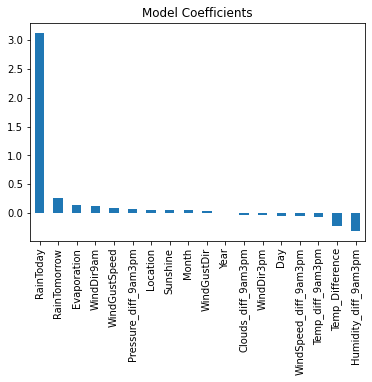

In [152]:
Model_reg(lr)

Model Report
MSE 10.372551988133369
Mean Absolute Error 0.9359188217947767
r2_score 68.28334803770446
CV 47.435059924362406
Difference between r2_score and cv is  20.84828811334205


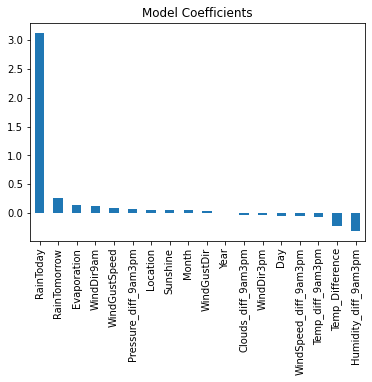

In [153]:
Model_reg(ridge)

Model Report
MSE 11.364539735437004
Mean Absolute Error 0.9359188217947767
r2_score 68.28334803770446
CV 42.8249652381832
Difference between r2_score and cv is  25.45838279952126


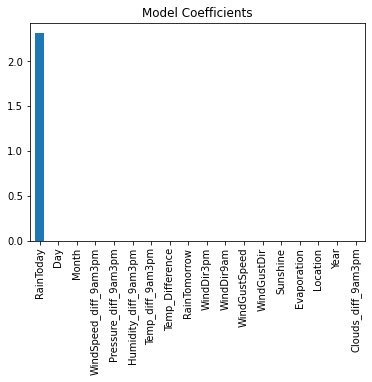

In [154]:
Model_reg(lasso)

Model Report
MSE 12.109963238064314
Mean Absolute Error 0.9359188217947767
r2_score 68.28334803770446
CV 39.18264986181215
Difference between r2_score and cv is  29.100698175892305


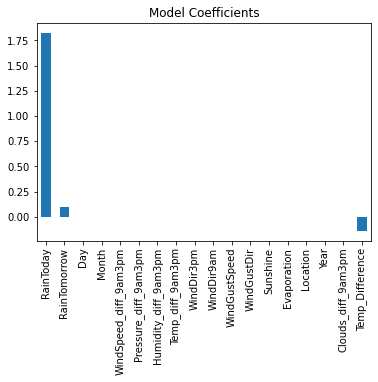

In [155]:
Model_reg(en)

In [156]:
def Model_Tree(Model):
    Model.fit(x_train,y_train)
    pred = Model.predict(x_test)
    cv_score = cross_val_score(Model,X,y,cv = 11)
    cv_score = np.abs(np.mean(cv_score))*100
    print('Model Report')
    print('MSE',mean_squared_error(y_test,pred))
    print('Mean Absolute Error',mean_absolute_error(y_test,pred_test))
    r2_Score = r2_score(y_test,pred_test)*100
    print('r2_score',r2_Score)
    print('CV', cv_score)
    coef = pd.Series(Model.feature_importances_,X.columns).sort_values(ascending=False)
    coef.plot(kind= 'bar', title = 'Model Coefficients')
    print('Difference between r2_score and cv is ',r2_Score-cv_score)

Model Report
MSE 14.052464648718368
Mean Absolute Error 0.9359188217947767
r2_score 68.28334803770446
CV 41.57650358688772
Difference between r2_score and cv is  26.70684445081674


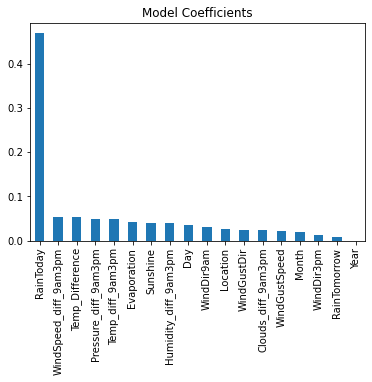

In [157]:
Model_Tree(dt)

Model Report
MSE 6.795480751942171
Mean Absolute Error 0.9359188217947767
r2_score 68.28334803770446
CV 66.69659740706416
Difference between r2_score and cv is  1.5867506306402959


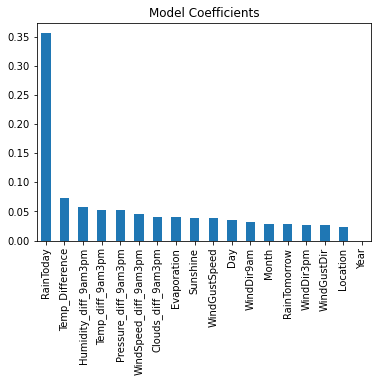

In [158]:
Model_Tree(rf)

Model Report
MSE 6.722332249156895
Mean Absolute Error 0.9359188217947767
r2_score 68.28334803770446
CV 68.03588516279989
Difference between r2_score and cv is  0.24746287490457064


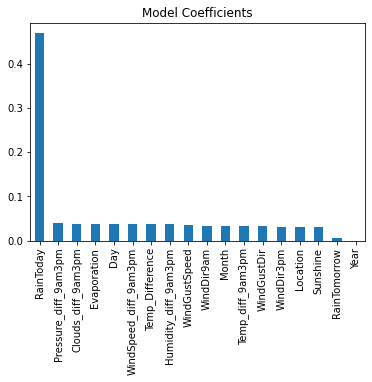

In [160]:
Model_Tree(et)

### HyperParameter Tuning

In [161]:
from sklearn.model_selection import GridSearchCV

In [162]:
rf = RandomForestRegressor()
parameters = {'n_estimators': list(range(25,501,25)),
               'max_features': ['auto', 'sqrt'],
               'max_depth': [2,3,5,None],
               'min_samples_split': [1,2,3,4]}
gcv= GridSearchCV(rf,parameters,cv=3,n_jobs=-1)
gcv.fit(x_train,y_train)
gcv.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 275}

In [163]:
gcv.best_estimator_

RandomForestRegressor(max_features='sqrt', n_estimators=275)

In [164]:
def Model(model):
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    cv_score = cross_val_score(model,x,y,cv = 15)
    cv_score = np.abs(np.mean(cv_score))*100
    print('Model Report')
    print('MSE',mean_squared_error(y_test,pred))
    print('Mean Absolute Error',mean_absolute_error(y_test,pred_test))
    r2_Score = r2_score(y_test,pred_test)*100
    print('r2_score',r2_Score)
    print('CV', cv_score)
    print('Difference between r2_score and cv is ',r2_Score-cv_score)

In [165]:
rf = RandomForestRegressor(max_features='sqrt', n_estimators=275)
Model(rf)

Model Report
MSE 6.963856710590262
Mean Absolute Error 0.9359188217947767
r2_score 68.28334803770446
CV 67.18747909420887
Difference between r2_score and cv is  1.0958689434955886


In [188]:
et = ExtraTreesRegressor()
parameters = {'n_estimators':[10,20,50,75],
             'max_depth':[None,5,10],
             'max_features':["auto", "sqrt", "log2"],
             'min_samples_split':[1,4,5,6]}
gcv= GridSearchCV(et,parameters,cv=3,n_jobs=-1)
gcv.fit(x_train,y_train)
gcv.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_split': 4,
 'n_estimators': 75}

In [189]:
gcv.best_estimator_

ExtraTreesRegressor(max_features='sqrt', min_samples_split=4, n_estimators=75)

Model Report
MSE 6.623746388202511
Mean Absolute Error 0.9359188217947767
r2_score 68.28334803770446
CV 68.23472742231404
Difference between r2_score and cv is  0.048620615390419175


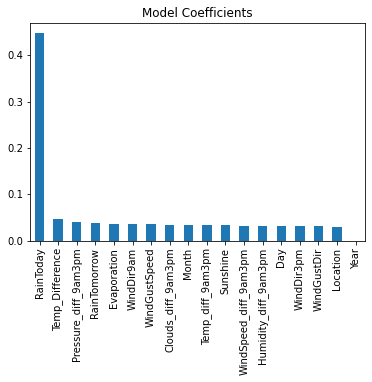

In [190]:
et = ExtraTreesRegressor(max_features='sqrt', min_samples_split=4, n_estimators=75)
Model_Tree(et)

### Best Model : ExtraTreesRegressor With HyperParameter Tuning

Model Report
MSE 6.74984479680217
Mean Absolute Error 0.9359188217947767
r2_score 68.28334803770446
CV 68.22959446886831
Difference between r2_score and cv is  0.05375356883614302


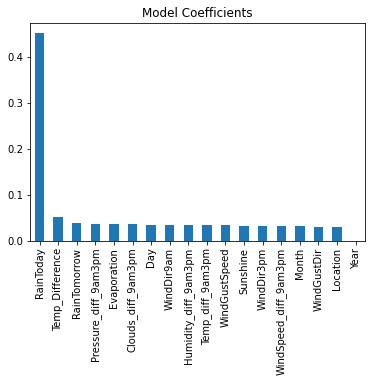

In [194]:
et = ExtraTreesRegressor(max_features='sqrt', min_samples_split=4, n_estimators=75)
Model_Tree(et)

### Saving Best Model

In [196]:
import pickle
filename = 'Weather_Australia.pkl'
pickle.dump(et,open(filename,'wb'))